In [ ]:
#importing all required python librabries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
pd.set_option('display.max_columns', None)
import optuna 
import warnings
warnings.filterwarnings("ignore")

d:\IV_Mastertheis\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:

df1 = pd.read_csv(r"D:\IV_Mastertheis\IV_data\Final_data\2012-13.csv", encoding='utf-8', encoding_errors='ignore')
df2 = pd.read_csv(r"D:\IV_Mastertheis\IV_data\Final_data\2014.csv", encoding='utf-8', encoding_errors='ignore')
df3 = pd.read_csv(r"D:\IV_Mastertheis\IV_data\Final_data\2015.csv", encoding='utf-8', encoding_errors='ignore')
df4 = pd.read_csv(r"D:\IV_Mastertheis\IV_data\Final_data\2016.csv", encoding='utf-8', encoding_errors='ignore')
df5 = pd.read_csv(r"D:\IV_Mastertheis\IV_data\Final_data\2017.csv", encoding='utf-8', encoding_errors='ignore')
df6 = pd.read_csv(r"D:\IV_Mastertheis\IV_data\Final_data\2018.csv", encoding='utf-8', encoding_errors='ignore')
df7 = pd.read_csv(r"D:\IV_Mastertheis\IV_data\Final_data\2019.csv", encoding='utf-8', encoding_errors='ignore')
df8 = pd.read_csv(r"D:\IV_Mastertheis\IV_data\Final_data\2020.csv", encoding='utf-8', encoding_errors='ignore')
df9 = pd.read_csv(r"D:\IV_Mastertheis\IV_data\Final_data\2021.csv", encoding='utf-8', encoding_errors='ignore')
df10 = pd.read_csv(r"D:\IV_Mastertheis\IV_data\Final_data\2022.csv", encoding='utf-8', encoding_errors='ignore')

C:\Users\VIP\AppData\Local\Temp\ipykernel_11368\1288547682.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv(r"D:\IV_Mastertheis\IV_data\Final_data\2012-13.csv", encoding='utf-8', encoding_errors='ignore')
C:\Users\VIP\AppData\Local\Temp\ipykernel_11368\1288547682.py:2: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv(r"D:\IV_Mastertheis\IV_data\Final_data\2014.csv", encoding='utf-8', encoding_errors='ignore')
C:\Users\VIP\AppData\Local\Temp\ipykernel_11368\1288547682.py:3: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df3 = pd.read_csv(r"D:\IV_Mastertheis\IV_data\Final_data\2015.csv", encoding='utf-8', encoding_errors='ignore')
C:\Users\VIP\AppData\Local\Temp\ipykernel_11368\1288547682.py:4: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memor

In [3]:
# Join vertically (like SQL UNION ALL)
df = pd.concat([df1, df2, df3, df4, df5, df6, df7,df8,df9,df10], ignore_index=True)
df.shape

(2663898, 39)

In [4]:
df.isnull().sum()

pvsnr                         0
vsnr                          0
status                        0
aktiv                         0
akt_kuka                      0
spartek                       0
beginn                        0
datum_s                 1127900
vtr_dau                      78
kund_beg                     10
vtrweg                        0
gesbeitr                     84
SDANZAHL                      5
SCHAGESA                      5
KOSTGESA                      5
KOSTGEKA                      5
kosten_verw                   5
kosten_prov                   5
gfeld                         0
ort                           0
plz                          19
alter                         0
anr                           0
SDBEITR5                      5
HERSTELLER                   59
HSN                       24971
TSN                       51671
ELEKTRO                      35
KILOMETERSTAND_CLEAN     649719
ZW                            0
WKZ                     1504968
KH_SF   

In [5]:
df.head()

,pvsnr,vsnr,status,aktiv,akt_kuka,spartek,beginn,datum_s,vtr_dau,kund_beg,vtrweg,gesbeitr,SDANZAHL,SCHAGESA,KOSTGESA,KOSTGEKA,kosten_verw,kosten_prov,gfeld,ort,plz,alter,anr,SDBEITR5,HERSTELLER,HSN,TSN,ELEKTRO,KILOMETERSTAND_CLEAN,ZW,WKZ,KH_SF,ERSZ_aktiv,ZW_storn,WKZ_storn,KH_SF_storn,ERSZ_storn,claim,ersz_final
0,1012223,01012223-003,Aktiv,1,1,VK,16.06.2013,NaN,4306.0,17.09.1969,V,110.00,0.0,0.0,0.0,0.0,70.54,41.38,70270/ Privatkunden,Flensburg,24944,83,71296/ Frau,404.26,VOLKSWAGEN-VW,603.0,ALL,N,104982.0,65697/ jhrlich,112.0,425.0,16JUN2009,*No Format*,NaN,NaN,NaN,0,16JUN2009
1,1012223,01012223-003,Aktiv,1,1,KH,16.06.2013,NaN,4306.0,17.09.1969,V,253.96,0.0,0.0,0.0,0.0,186.81,89.36,70270/ Privatkunden,Flensburg,24944,83,71296/ Frau,1076.16,VOLKSWAGEN-VW,603.0,ALL,N,104982.0,65697/ jhrlich,112.0,425.0,16JUN2009,*No Format*,NaN,NaN,NaN,0,16JUN2009
2,1012748,01012748-002,Storno,0,0,VK,08.10.2013,09.03.2024,3805.0,03.05.1979,V,325.06,0.0,0.0,0.0,0.0,134.57,77.70,70269/ Land- und Forstwirtschaft,Bxlund,24994,999,01515/ Erbengemeinschaft,752.15,NISSAN (J),1329.0,AHQ,N,50000.0,*No Format*,NaN,NaN,NaN,65699/ vierteljhrlich,112.0,443.0,20JUN2018,0,20JUN2018
3,1012748,01012748-002,Storno,0,0,KH,08.10.2013,09.03.2024,3805.0,03.05.1979,V,186.02,0.0,0.0,0.0,0.0,121.83,58.12,70269/ Land- und Forstwirtschaft,Bxlund,24994,999,01515/ Erbengemeinschaft,703.32,NISSAN (J),1329.0,AHQ,N,50000.0,*No Format*,NaN,NaN,NaN,65699/ vierteljhrlich,112.0,443.0,20JUN2018,0,20JUN2018
4,1012748,01012748-002,Storno,0,0,TK,08.10.2013,13.10.2021,2927.0,03.05.1979,V,0.00,0.0,0.0,0.0,0.0,19.41,8.72,70269/ Land- und Forstwirtschaft,Bxlund,24994,999,01515/ Erbengemeinschaft,104.68,NISSAN (J),1329.0,AHQ,N,50000.0,*No Format*,NaN,NaN,NaN,65699/ vierteljhrlich,112.0,443.0,20JUN2018,0,20JUN2018


In [6]:
#df = df.dropna(subset=['vtr_dau', 'gesbeitr',"HERSTELLER",'SDBEITR5','ELEKTRO','TSN','HSN','plz'])
df = df.dropna(subset=['vtr_dau', 'gesbeitr',"HERSTELLER",'SDBEITR5','ELEKTRO','plz','ersz_final'])
df= df.drop(['WKZ','KH_SF','ZW','ERSZ_aktiv','ZW_storn','WKZ_storn','KH_SF_storn','ERSZ_storn'], axis=1)

In [7]:
df['beginn'] = pd.to_datetime(df['beginn'], format='%d.%m.%Y')
df['beg_year'] = df['beginn'].dt.year
df['beg_month'] = df['beginn'].dt.month
df['beg_day'] = df['beginn'].dt.day
# Extracting Weekday from date
df['weekday'] = df['beginn'].dt.day_name()
df['Quarter'] = pd.to_datetime(df['beg_month'], format='%m').dt.quarter

In [8]:
df['Weekday_id'] = pd.factorize(df['weekday'])[0]+1
df.replace({'V':1, 'M':2, 'S':3, 'D':4},inplace=True)

C:\Users\VIP\AppData\Local\Temp\ipykernel_11368\1923708196.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'V':1, 'M':2, 'S':3, 'D':4},inplace=True)


In [9]:
df['Cus_type'] = df['gfeld'].str.split('/').str[0]
df['Cus_typ_id'] = pd.factorize(df['Cus_type'])[0]+1
df['ort_id'] = pd.factorize(df['ort'])[0]+1
df[['Sex_id','Sex']]= df['anr'].str.split('/',expand=True)
df['gender_id'] = pd.factorize(df['Sex_id'])[0]+1
df['plz_id'] = pd.factorize(df['plz'])[0]+1
df['Hersteller_id'] = pd.factorize(df['HERSTELLER'])[0]+1
df['spartek'] = pd.factorize(df['spartek'])[0]+1



In [10]:
df.Sex.unique()

array([' Frau', ' Erbengemeinschaft', ' Herr', ' (Unternehmen)',
       ' (sonstige)', ' Firma'], dtype=object)

In [11]:
plz_state_mapping = {
    '01': 'Sachsen',
    '02': 'Sachsen',
    '03': 'Brandenburg',
    '04': 'Sachsen',
    '05': 'Sachsen-Anhalt',
    '06': 'Sachsen-Anhalt',
    '07': 'Thüringen',
    '08': 'Sachsen',
    '09': 'Sachsen',

    '10': 'Berlin', '11': 'Berlin', '12': 'Brandenburg',
    '13': 'Brandenburg', '14': 'Brandenburg', '15': 'Brandenburg',
    '16': 'Brandenburg',

    '17': 'Mecklenburg-Vorpommern', '18': 'Mecklenburg-Vorpommern',
    '19': 'Mecklenburg-Vorpommern',

    '20': 'Schleswig-Holstein', '21': 'Schleswig-Holstein',
    '22': 'Hamburg', '23': 'Schleswig-Holstein',

    '24': 'Schleswig-Holstein', '25': 'Schleswig-Holstein',
    '26': 'Niedersachsen', '27': 'Bremen', '28': 'Bremen',
    '29': 'Niedersachsen',

    '30': 'Niedersachsen', '31': 'Niedersachsen', '32': 'Nordrhein-Westfalen',
    '33': 'Nordrhein-Westfalen', '34': 'Hessen',

    '35': 'Hessen', '36': 'Hessen', '37': 'Niedersachsen',
    '38': 'Niedersachsen', '39': 'Sachsen-Anhalt',

    '40': 'Nordrhein-Westfalen', '41': 'Nordrhein-Westfalen',
    '42': 'Nordrhein-Westfalen', '44': 'Nordrhein-Westfalen',
    '45': 'Nordrhein-Westfalen', '46': 'Nordrhein-Westfalen',

    '47': 'Nordrhein-Westfalen', '48': 'Nordrhein-Westfalen',
    '49': 'Niedersachsen',

    '50': 'Nordrhein-Westfalen', '51': 'Nordrhein-Westfalen',
    '52': 'Nordrhein-Westfalen', '53': 'Nordrhein-Westfalen',
    '54': 'Rheinland-Pfalz', '55': 'Rheinland-Pfalz',

    '56': 'Rheinland-Pfalz', '57': 'Nordrhein-Westfalen',
    '58': 'Nordrhein-Westfalen', '59': 'Nordrhein-Westfalen',

    '60': 'Hessen', '61': 'Hessen', '62': 'Hessen',
    '63': 'Hessen', '64': 'Hessen', '65': 'Hessen',

    '66': 'Saarland', '67': 'Rheinland-Pfalz', '68': 'Rheinland-Pfalz',
    '69': 'Hessen',

    '70': 'Baden-Württemberg', '71': 'Baden-Württemberg',
    '72': 'Baden-Württemberg', '73': 'Baden-Württemberg',
    '74': 'Baden-Württemberg', '75': 'Baden-Württemberg',
    '76': 'Baden-Württemberg', '77': 'Baden-Württemberg',
    '78': 'Baden-Württemberg', '79': 'Baden-Württemberg',

    '80': 'Bayern', '81': 'Bayern', '82': 'Bayern', '83': 'Bayern',
    '84': 'Bayern', '85': 'Bayern', '86': 'Bayern', '87': 'Bayern',
    '88': 'Bayern', '89': 'Bayern',

    '90': 'Bayern', '91': 'Bayern', '92': 'Bayern', '93': 'Bayern',
    '94': 'Bayern', '95': 'Bayern', '96': 'Bayern',

    '97': 'Bayern', '98': 'Thüringen', '99': 'Thüringen'
}

def get_state_from_plz(plz):
    if pd.isnull(plz):
        return None
    try:
        plz_str = str(plz).zfill(5)  # ensure it's 5 digits
        return plz_state_mapping.get(plz_str[:2])
    except:
        return None
    
df['state'] = df['plz'].apply(get_state_from_plz)
df['state_id'] = pd.factorize(df['state'])[0]+1
df = df.dropna(subset=['state'])


In [12]:
df['status_id'] = pd.factorize(df['status'])[0]+1
df['ELEKTRO'] = pd.factorize(df['ELEKTRO'])[0]+1

In [13]:
#Using this technique as factorize make nan values to 0, nan values should be in nan 
codes, uniques = pd.factorize(df['TSN'], sort=True)
df['TSN'] = np.where(df['TSN'].isna(), np.nan, codes + 1)
df['alter'] = df['alter'].replace([998, 999], np.nan)


In [14]:
df['First_reg'] = pd.to_datetime(df['ersz_final'], format="%d%b%Y")


In [15]:
df['Car_age_indays'] = (pd.Timestamp.today() - df['First_reg']).dt.days


In [16]:
df['carage_years'] = df['Car_age_indays'] / 365.25
df['carage_years'] = df['carage_years'].round(0)


In [17]:
df = df[df['carage_years'] >= 0]


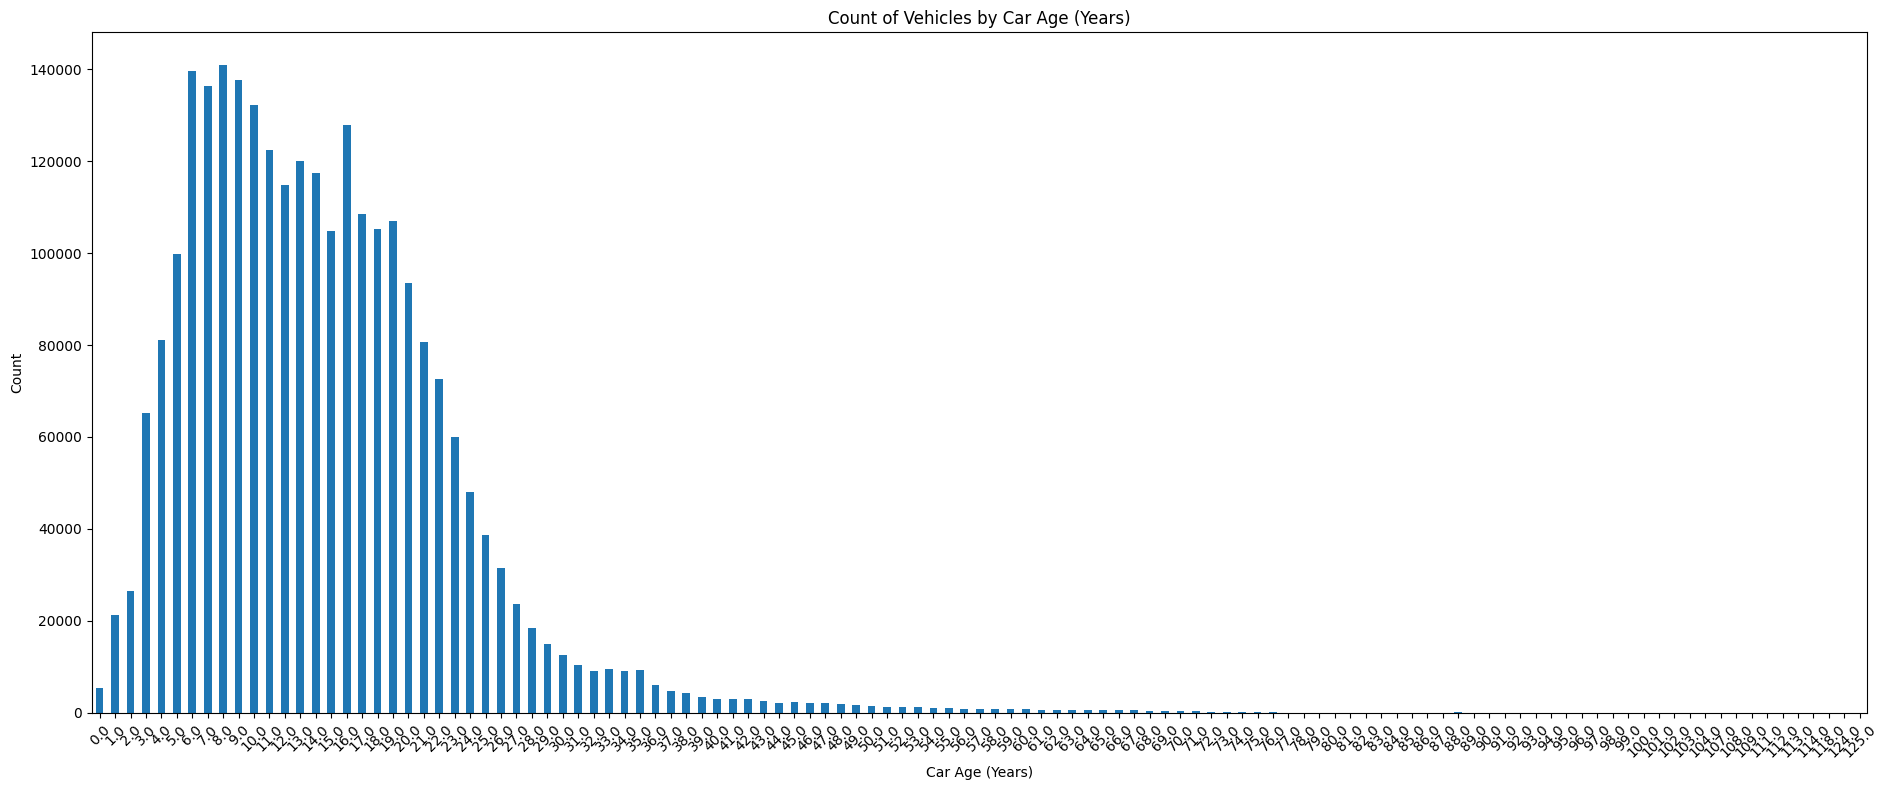

In [18]:
df['carage_years'].value_counts().sort_index().plot(kind='bar', figsize=(19,8))
plt.title('Count of Vehicles by Car Age (Years)')
plt.xlabel('Car Age (Years)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [19]:
df.isnull().sum()


pvsnr                         0
vsnr                          0
status                        0
aktiv                         0
akt_kuka                      0
spartek                       0
beginn                        0
datum_s                 1118311
vtr_dau                       0
kund_beg                      0
vtrweg                        0
gesbeitr                      0
SDANZAHL                      0
SCHAGESA                      0
KOSTGESA                      0
KOSTGEKA                      0
kosten_verw                   0
kosten_prov                   0
gfeld                         0
ort                           0
plz                           0
alter                    250580
anr                           0
SDBEITR5                      0
HERSTELLER                    0
HSN                       20962
TSN                       45211
ELEKTRO                       0
KILOMETERSTAND_CLEAN     602825
claim                         0
ersz_final                    0
beg_year

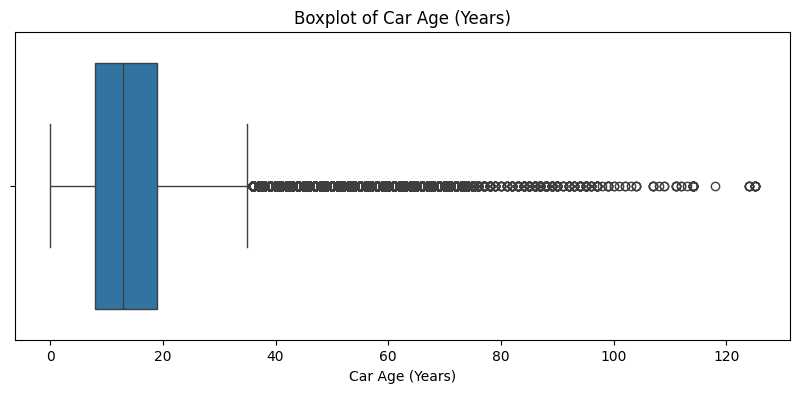

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
sns.boxplot(x=df['carage_years'])  # Or use another numeric column
plt.title('Boxplot of Car Age (Years)')
plt.xlabel('Car Age (Years)')
plt.show()


In [21]:
df.head()

,pvsnr,vsnr,status,aktiv,akt_kuka,spartek,beginn,datum_s,vtr_dau,kund_beg,vtrweg,gesbeitr,SDANZAHL,SCHAGESA,KOSTGESA,KOSTGEKA,kosten_verw,kosten_prov,gfeld,ort,plz,alter,anr,SDBEITR5,HERSTELLER,HSN,TSN,ELEKTRO,KILOMETERSTAND_CLEAN,claim,ersz_final,beg_year,beg_month,beg_day,weekday,Quarter,Weekday_id,Cus_type,Cus_typ_id,ort_id,Sex_id,Sex,gender_id,plz_id,Hersteller_id,state,state_id,status_id,First_reg,Car_age_indays,carage_years
0,1012223,01012223-003,Aktiv,1,1,1,2013-06-16,NaN,4306.0,17.09.1969,1,110.00,0.0,0.0,0.0,0.0,70.54,41.38,70270/ Privatkunden,Flensburg,24944,83.0,71296/ Frau,404.26,VOLKSWAGEN-VW,603.0,1346.0,1,104982.0,0,16JUN2009,2013,6,16,Sunday,2,1,70270,1,1,71296,Frau,1,1,1,Schleswig-Holstein,1,1,2009-06-16,5847,16.0
1,1012223,01012223-003,Aktiv,1,1,2,2013-06-16,NaN,4306.0,17.09.1969,1,253.96,0.0,0.0,0.0,0.0,186.81,89.36,70270/ Privatkunden,Flensburg,24944,83.0,71296/ Frau,1076.16,VOLKSWAGEN-VW,603.0,1346.0,1,104982.0,0,16JUN2009,2013,6,16,Sunday,2,1,70270,1,1,71296,Frau,1,1,1,Schleswig-Holstein,1,1,2009-06-16,5847,16.0
2,1012748,01012748-002,Storno,0,0,1,2013-10-08,09.03.2024,3805.0,03.05.1979,1,325.06,0.0,0.0,0.0,0.0,134.57,77.70,70269/ Land- und Forstwirtschaft,Bxlund,24994,NaN,01515/ Erbengemeinschaft,752.15,NISSAN (J),1329.0,1245.0,1,50000.0,0,20JUN2018,2013,10,8,Tuesday,4,2,70269,2,2,01515,Erbengemeinschaft,2,2,2,Schleswig-Holstein,1,2,2018-06-20,2556,7.0
3,1012748,01012748-002,Storno,0,0,2,2013-10-08,09.03.2024,3805.0,03.05.1979,1,186.02,0.0,0.0,0.0,0.0,121.83,58.12,70269/ Land- und Forstwirtschaft,Bxlund,24994,NaN,01515/ Erbengemeinschaft,703.32,NISSAN (J),1329.0,1245.0,1,50000.0,0,20JUN2018,2013,10,8,Tuesday,4,2,70269,2,2,01515,Erbengemeinschaft,2,2,2,Schleswig-Holstein,1,2,2018-06-20,2556,7.0
4,1012748,01012748-002,Storno,0,0,3,2013-10-08,13.10.2021,2927.0,03.05.1979,1,0.00,0.0,0.0,0.0,0.0,19.41,8.72,70269/ Land- und Forstwirtschaft,Bxlund,24994,NaN,01515/ Erbengemeinschaft,104.68,NISSAN (J),1329.0,1245.0,1,50000.0,0,20JUN2018,2013,10,8,Tuesday,4,2,70269,2,2,01515,Erbengemeinschaft,2,2,2,Schleswig-Holstein,1,2,2018-06-20,2556,7.0


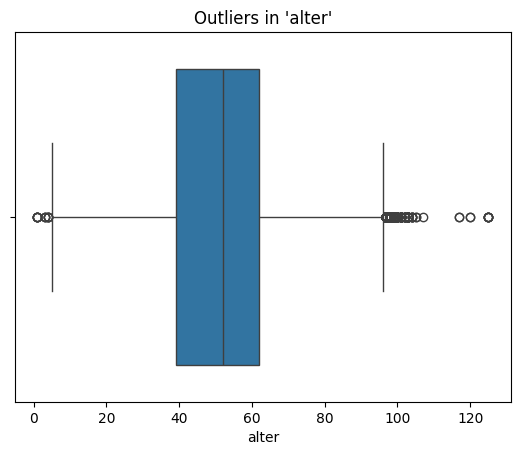

In [22]:
sns.boxplot(x=df['alter'])
plt.title("Outliers in 'alter'")
plt.show()


In [23]:
df = df[df['alter'] >= 18].copy()


In [24]:
#Handeling missing alter values 
missing_count = df['alter'].isnull().sum()
min_age = 18
max_age = 85
random_ages = np.random.randint(min_age, max_age + 1, size=missing_count)
df.loc[df['alter'].isnull(), 'alter'] = random_ages

In [25]:
df = df.dropna(subset=['TSN']).copy()
df['TSN_id']= pd.factorize(df['TSN'])[0]+1  


In [26]:
# To estimate the actual amount customer paid during his entire duration of service 
df['estimated_total_paid'] = (df['SDBEITR5'] / (5 * 365)) * df['vtr_dau']

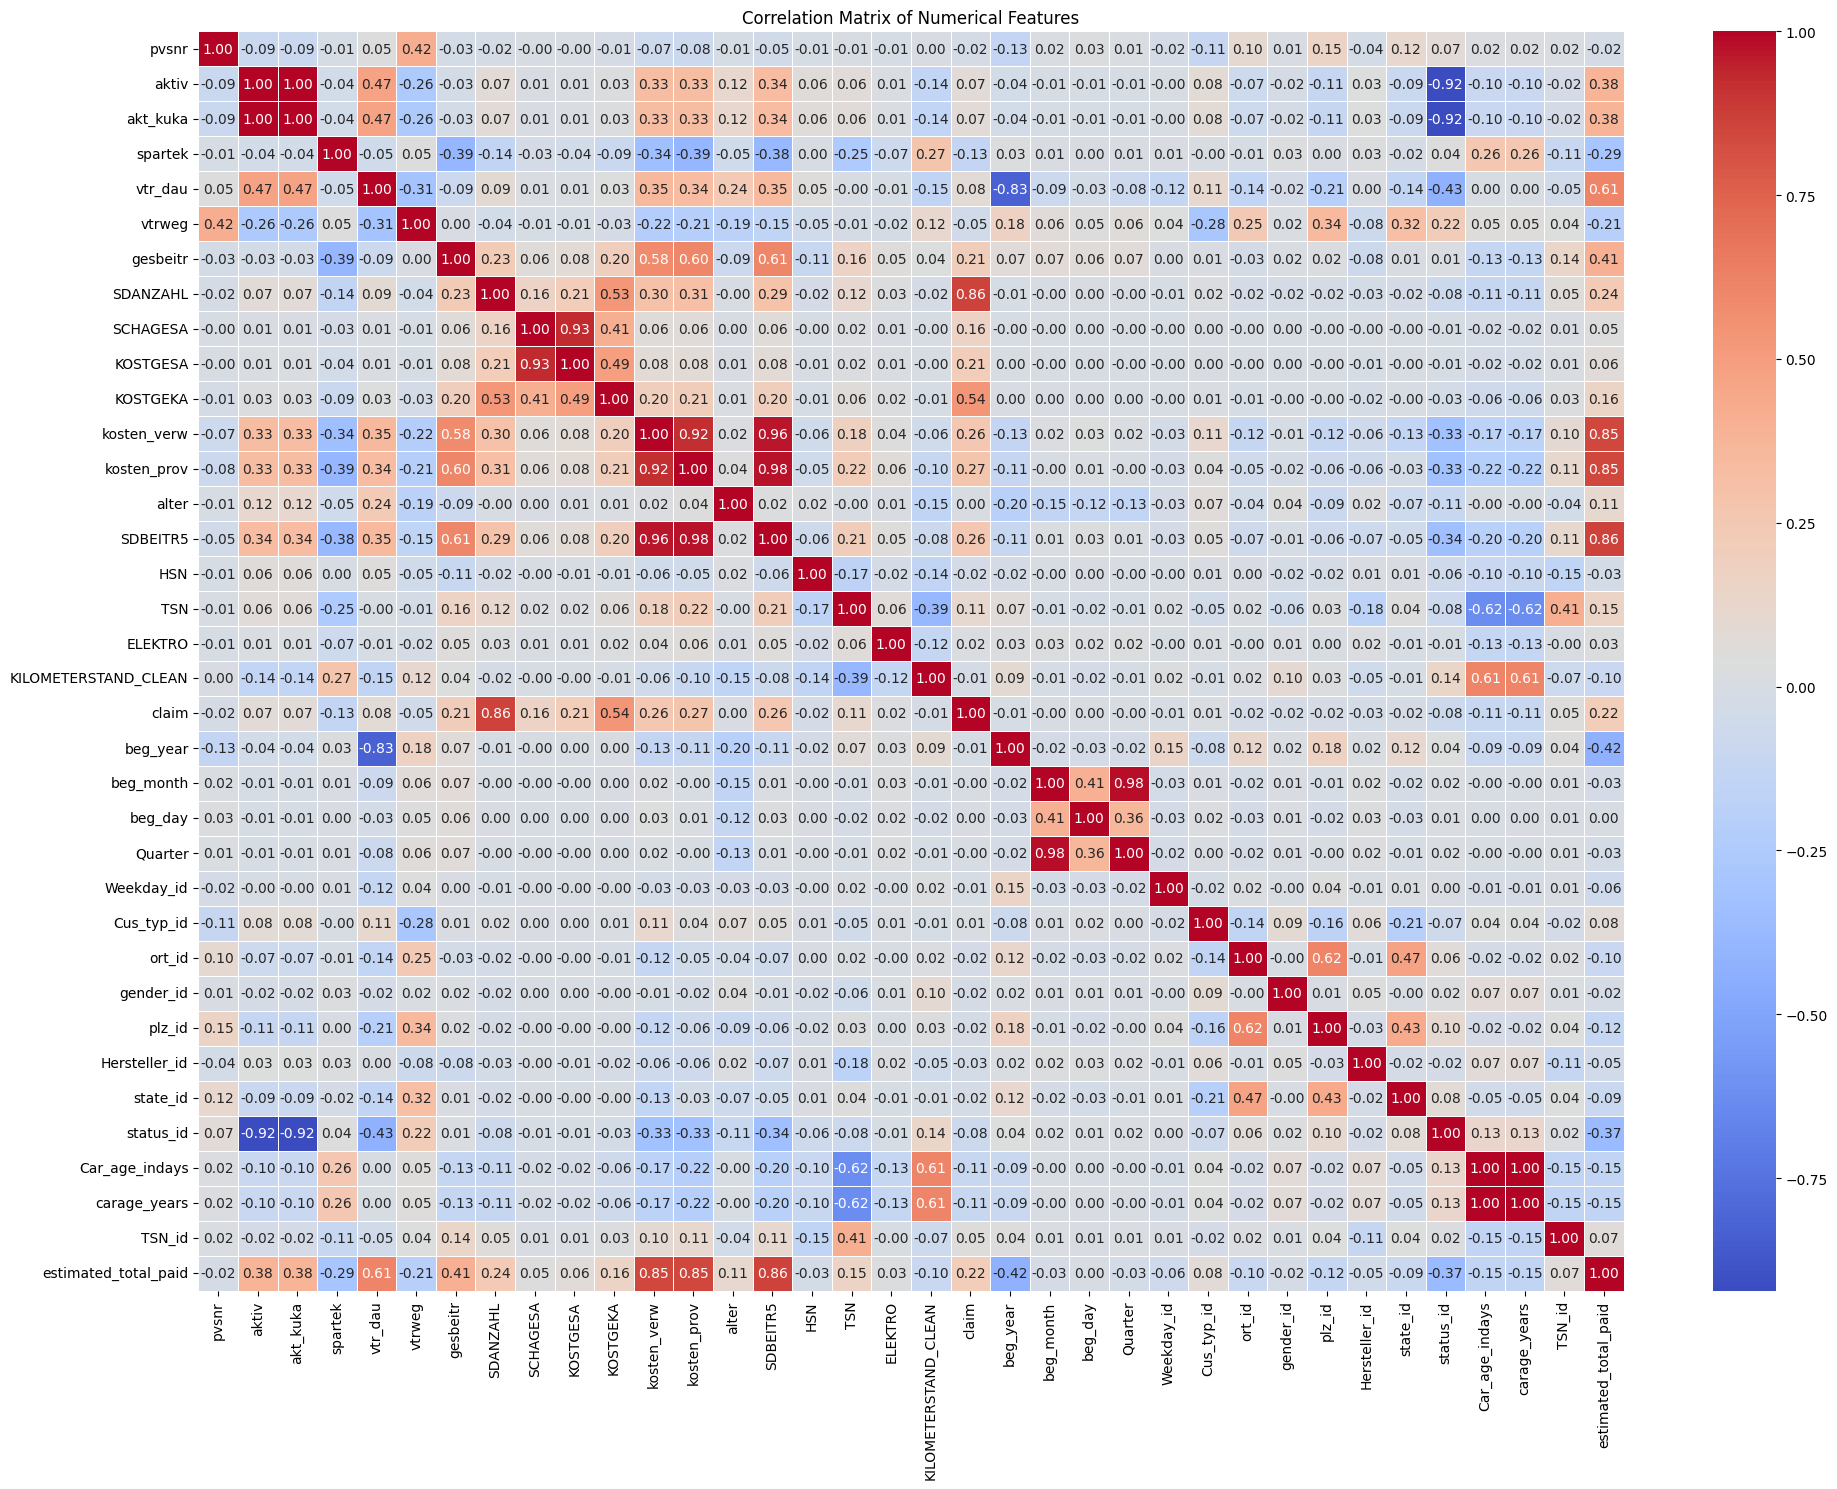

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Select only numerical columns
numeric_df = df.select_dtypes(include=['number'])

# 2. Compute correlation matrix
corr_matrix = numeric_df.corr()

# 3. Display as heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

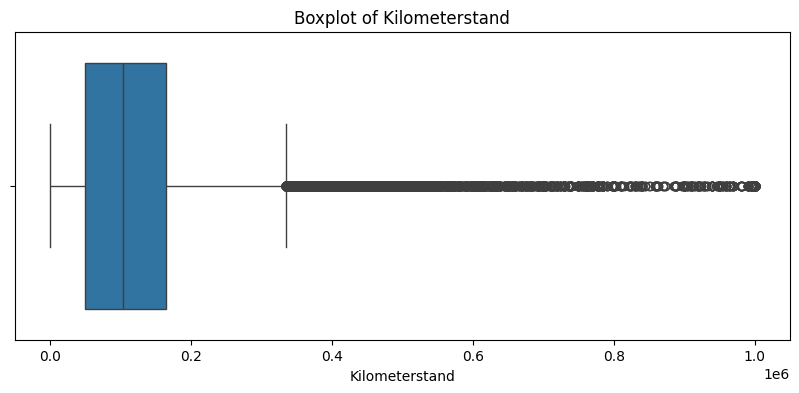

In [28]:


plt.figure(figsize=(10, 4))
sns.boxplot(x=df['KILOMETERSTAND_CLEAN'])
plt.title('Boxplot of Kilometerstand')
plt.xlabel('Kilometerstand')
plt.show()


In [29]:
df.to_csv("df_missing_kilometerstand.csv", index=False)

In [29]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

# 1. Split data into known and unknown
df_known = df[df['KILOMETERSTAND_CLEAN'].notnull()]
df_unknown = df[df['KILOMETERSTAND_CLEAN'].isnull()]

# 2. Select features
features = [
    'alter', 'Hersteller_id','estimated_total_paid','aktiv',
    'vtr_dau','gender_id','TSN_id','kosten_prov','status_id','Car_age_indays','spartek'
]

# 3. Prepare training data
X = df_known[features]
y = df_known['KILOMETERSTAND_CLEAN']

# 4. Train XGBoost Regressor
model = XGBRegressor(n_estimators=100, random_state=42, n_jobs=-1, verbosity=0)
model.fit(X, y)

# 5. Predict missing values
X_missing = df_unknown[features]
predicted_km = model.predict(X_missing)

# 6. Fill missing values
df.loc[df['KILOMETERSTAND_CLEAN'].isnull(), 'KILOMETERSTAND_CLEAN'] = predicted_km


In [30]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# 1. Split known data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Train the XGBoost model
model = XGBRegressor(n_estimators=100, random_state=42, n_jobs=-1, verbosity=0)
model.fit(X_train, y_train)

# 3. Predict on the test set
y_pred = model.predict(X_test)

# 4. Evaluate performance
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

# 5. Print evaluation results
print(f"R² score: {r2:.4f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")


R² score: 0.5555
RMSE: 54219.92
MAE: 38704.81


In [31]:
predicted_df = df_unknown.copy()
predicted_df['KILOMETERSTAND_CLEAN_predicted'] = predicted_km

# Select columns to display (add/remove as needed)
columns_to_show = [
    'KILOMETERSTAND_CLEAN_predicted',  # the predicted values
    'alter',
    'HERSTELLER',
    'beg_year',
    'state',
    'plz'
]

# Display the first 10 rows
predicted_vales = (predicted_df[columns_to_show])

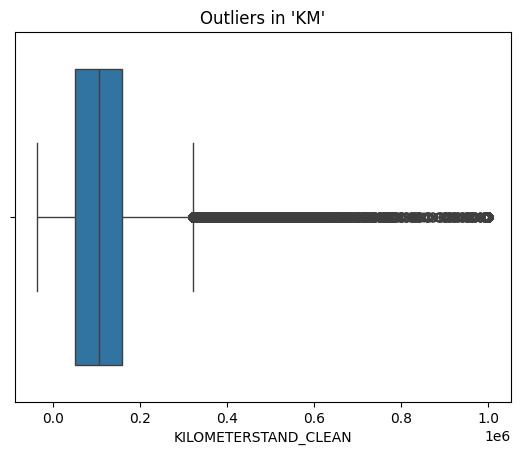

In [32]:
sns.boxplot(x=df['KILOMETERSTAND_CLEAN'])
plt.title("Outliers in 'KM'")
plt.show()

In [33]:
#df_EDA = df.to_csv("output.csv", index=False)
#df_EDA_p = df.to_pickle("output.pkl")

In [34]:
df_1 = df

In [35]:
#df[df['KILOMETERSTAND_CLEAN'].notnull()].head(10)

In [36]:
#df_clean1 = pd.read_csv('D:\IV_Mastertheis\df_clean.csv')

In [37]:
#df.head()

In [38]:
#df.info()

In [39]:
for col in df_1.columns:
    print(col, df_1[col].unique())
    print('-'*50)

pvsnr [ 1012223  1013206  1013242 ... 99929620 99930834 99934571]
--------------------------------------------------
vsnr ['01012223-003' '01013206-003' '01013242-004' ... '99934072-011'
 '99934342-002' '99934571-001']
--------------------------------------------------
status ['Aktiv' 'Storno' 'Saison' 'Ruhend' 'Schwebe' 'Kurzfrist']
--------------------------------------------------
aktiv [1 0]
--------------------------------------------------
akt_kuka [1 0]
--------------------------------------------------
spartek [1 2 3]
--------------------------------------------------
beginn <DatetimeArray>
['2013-06-16 00:00:00', '2013-01-01 00:00:00', '2012-01-01 00:00:00',
 '2012-08-03 00:00:00', '2012-07-19 00:00:00', '2013-08-08 00:00:00',
 '2013-12-01 00:00:00', '2013-03-28 00:00:00', '2012-11-14 00:00:00',
 '2013-05-10 00:00:00',
 ...
 '2022-11-13 00:00:00', '2022-12-04 00:00:00', '2022-05-21 00:00:00',
 '2022-03-06 00:00:00', '2022-04-03 00:00:00', '2022-07-31 00:00:00',
 '2022-08-14 00

In [40]:
pd.set_option('display.float_format', '{:.2f}'.format)
print(df_1.describe())

            pvsnr      aktiv   akt_kuka    spartek  \
count  2335742.00 2335742.00 2335742.00 2335742.00   
mean  30289931.11       0.43       0.43       2.04   
min    1010907.00       0.00       0.00       1.00   
25%   24317255.25       0.00       0.00       2.00   
50%   25087590.00       0.00       0.00       2.00   
75%   25610991.00       1.00       1.00       2.00   
max   99934651.00       1.00       1.00       3.00   
std   20453221.31       0.49       0.49       0.66   

                              beginn    vtr_dau     vtrweg   gesbeitr  \
count                        2335742 2335742.00 2335742.00 2335742.00   
mean   2019-05-08 21:07:57.351694336    1602.63       2.51     248.52   
min              2012-01-01 00:00:00       0.00       1.00      -6.00   
25%              2018-01-01 00:00:00     731.00       2.00      95.42   
50%              2020-01-01 00:00:00    1410.00       2.00     206.84   
75%              2021-04-23 00:00:00    2276.00       4.00     331.91   
ma

In [41]:
def plot_histogram(df_1, column_name):

  plt.figure(figsize=(8, 5))
  sns.histplot(df_1[column_name], kde=True)
  plt.title(f"Distribution of {column_name}")

  # calculate the mean and median values for the columns
  col_mean = df_1[column_name].mean()
  col_median = df_1[column_name].median()

  # add vertical lines for mean and median
  plt.axvline(col_mean, color="red", linestyle="--", label="Mean")
  plt.axvline(col_median, color="green", linestyle="-", label="Median")

  plt.legend()

  plt.show()

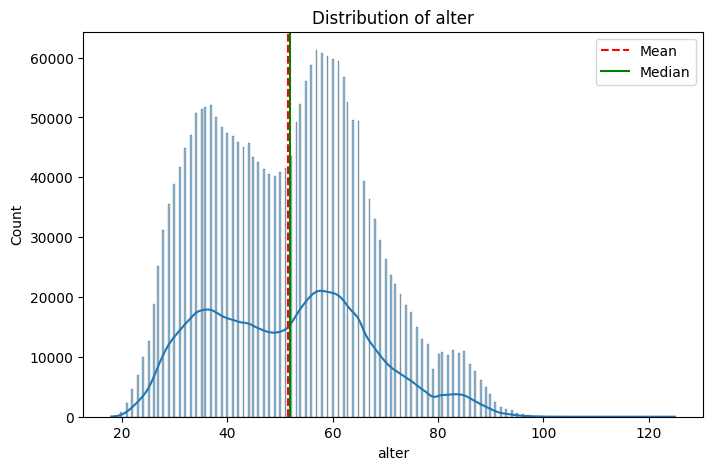

In [42]:
plot_histogram(df_1, "alter")

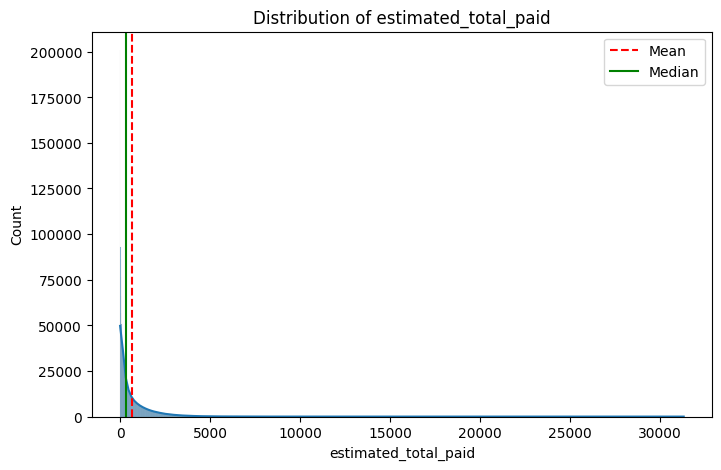

In [43]:
plot_histogram(df_1, "estimated_total_paid")

In [44]:
df_1['Dura_in_yrs'] = df_1['vtr_dau'] // 365

In [45]:
df_1.head()

,pvsnr,vsnr,status,aktiv,akt_kuka,spartek,beginn,datum_s,vtr_dau,kund_beg,vtrweg,gesbeitr,SDANZAHL,SCHAGESA,KOSTGESA,KOSTGEKA,kosten_verw,kosten_prov,gfeld,ort,plz,alter,anr,SDBEITR5,HERSTELLER,HSN,TSN,ELEKTRO,KILOMETERSTAND_CLEAN,claim,ersz_final,beg_year,beg_month,beg_day,weekday,Quarter,Weekday_id,Cus_type,Cus_typ_id,ort_id,Sex_id,Sex,gender_id,plz_id,Hersteller_id,state,state_id,status_id,First_reg,Car_age_indays,carage_years,TSN_id,estimated_total_paid,Dura_in_yrs
0,1012223,01012223-003,Aktiv,1,1,1,2013-06-16,NaN,4306.00,17.09.1969,1,110.00,0.00,0.00,0.00,0.00,70.54,41.38,70270/ Privatkunden,Flensburg,24944,83.00,71296/ Frau,404.26,VOLKSWAGEN-VW,603.00,1346.00,1,104982.00,0,16JUN2009,2013,6,16,Sunday,2,1,70270,1,1,71296,Frau,1,1,1,Schleswig-Holstein,1,1,2009-06-16,5845,16.00,1,953.83,11.00
1,1012223,01012223-003,Aktiv,1,1,2,2013-06-16,NaN,4306.00,17.09.1969,1,253.96,0.00,0.00,0.00,0.00,186.81,89.36,70270/ Privatkunden,Flensburg,24944,83.00,71296/ Frau,1076.16,VOLKSWAGEN-VW,603.00,1346.00,1,104982.00,0,16JUN2009,2013,6,16,Sunday,2,1,70270,1,1,71296,Frau,1,1,1,Schleswig-Holstein,1,1,2009-06-16,5845,16.00,1,2539.15,11.00
5,1013206,01013206-003,Aktiv,1,1,1,2013-01-01,NaN,4472.00,21.07.1977,1,313.58,0.00,0.00,0.00,0.00,232.13,135.88,70270/ Privatkunden,Sieverstedt,24885,74.00,71295/ Herr,1327.05,BMW BAYERISCHE MOTORENWER,5.00,2842.00,1,35000.00,0,11DEC2020,2013,1,1,Tuesday,1,2,70270,1,3,71295,Herr,3,3,3,Schleswig-Holstein,1,1,2020-12-11,1649,5.00,2,3251.82,12.00
6,1013206,01013206-003,Aktiv,1,1,2,2013-01-01,NaN,4472.00,21.07.1977,1,95.42,1.00,3481.01,3481.01,4402.64,82.90,39.66,70270/ Privatkunden,Sieverstedt,24885,74.00,71295/ Herr,478.44,BMW BAYERISCHE MOTORENWER,5.00,2842.00,1,35000.00,1,11DEC2020,2013,1,1,Tuesday,1,2,70270,1,3,71295,Herr,3,3,3,Schleswig-Holstein,1,1,2020-12-11,1649,5.00,2,1172.37,12.00
7,1013242,01013242-004,Aktiv,1,1,2,2012-01-01,NaN,4838.00,26.09.1975,1,212.80,0.00,0.00,0.00,0.00,155.16,74.26,70270/ Privatkunden,Lrschau,24850,82.00,71296/ Frau,894.10,NISSAN (J),1329.00,1104.00,1,28000.00,0,02APR2009,2012,1,1,Sunday,1,1,70270,1,4,71296,Frau,1,4,2,Schleswig-Holstein,1,1,2009-04-02,5920,16.00,3,2370.22,13.00


In [46]:
columns_needed = [
    "vsnr",'aktiv', "vtr_dau","Dura_in_yrs", "vtrweg", "SDANZAHL", "SCHAGESA", "KOSTGESA",
    "kosten_verw", "kosten_prov", "alter", "ELEKTRO", "KILOMETERSTAND_CLEAN",
    "claim", "beg_year", "beg_month", "Quarter", "Weekday_id", "Cus_typ_id",
    "ort_id", "gender_id", "plz_id", "Hersteller_id", "state_id", "TSN_id",
    "estimated_total_paid",'spartek','carage_years','Car_age_indays'
]

In [47]:
df_imp = df_1[columns_needed]

In [48]:
df_imp.head()

,vsnr,aktiv,vtr_dau,Dura_in_yrs,vtrweg,SDANZAHL,SCHAGESA,KOSTGESA,kosten_verw,kosten_prov,alter,ELEKTRO,KILOMETERSTAND_CLEAN,claim,beg_year,beg_month,Quarter,Weekday_id,Cus_typ_id,ort_id,gender_id,plz_id,Hersteller_id,state_id,TSN_id,estimated_total_paid,spartek,carage_years,Car_age_indays
0,01012223-003,1,4306.00,11.00,1,0.00,0.00,0.00,70.54,41.38,83.00,1,104982.00,0,2013,6,2,1,1,1,1,1,1,1,1,953.83,1,16.00,5845
1,01012223-003,1,4306.00,11.00,1,0.00,0.00,0.00,186.81,89.36,83.00,1,104982.00,0,2013,6,2,1,1,1,1,1,1,1,1,2539.15,2,16.00,5845
5,01013206-003,1,4472.00,12.00,1,0.00,0.00,0.00,232.13,135.88,74.00,1,35000.00,0,2013,1,1,2,1,3,3,3,3,1,2,3251.82,1,5.00,1649
6,01013206-003,1,4472.00,12.00,1,1.00,3481.01,3481.01,82.90,39.66,74.00,1,35000.00,1,2013,1,1,2,1,3,3,3,3,1,2,1172.37,2,5.00,1649
7,01013242-004,1,4838.00,13.00,1,0.00,0.00,0.00,155.16,74.26,82.00,1,28000.00,0,2012,1,1,1,1,4,1,4,2,1,3,2370.22,2,16.00,5920


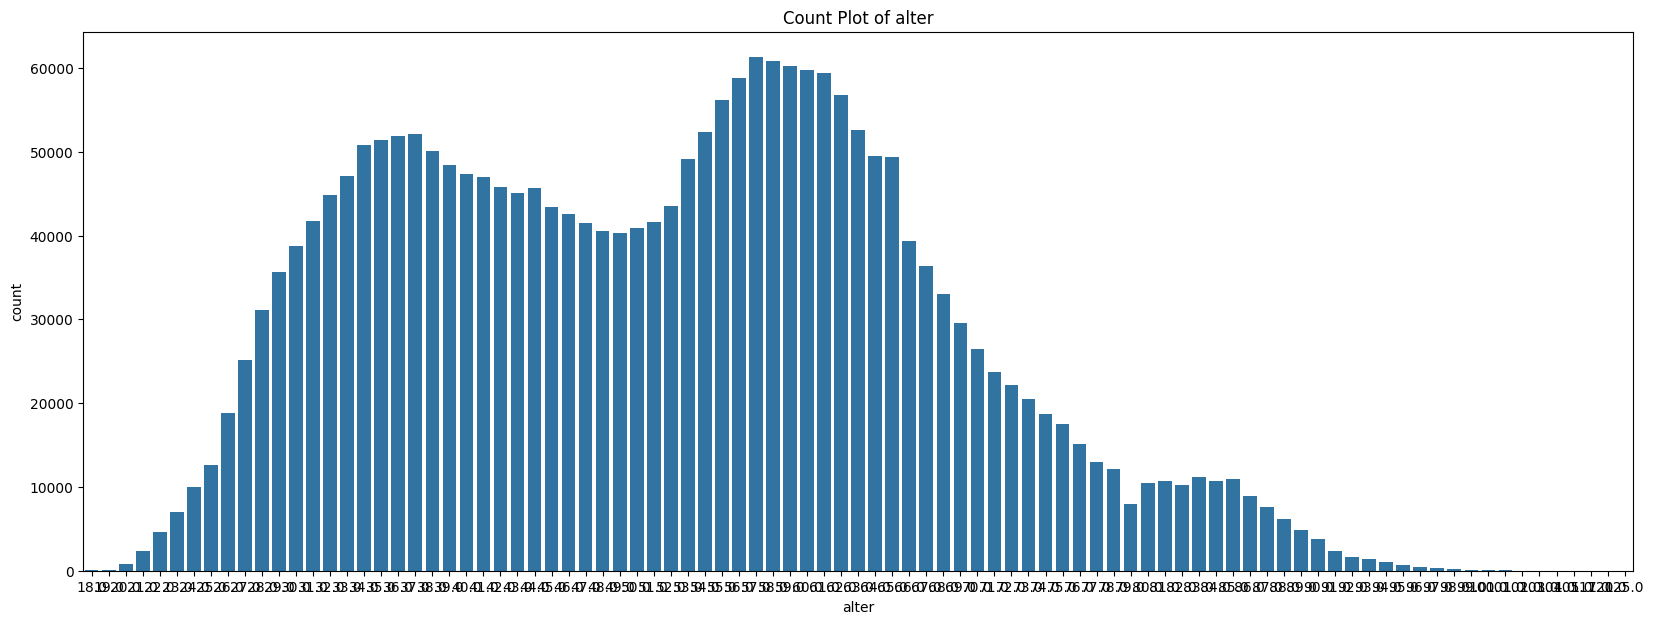

In [49]:
object_cols = ["alter"] 

for col in object_cols:
  plt.figure(figsize=(20, 7))
  sns.countplot(x=df_imp[col])
  plt.title(f"Count Plot of {col}")
  plt.show()

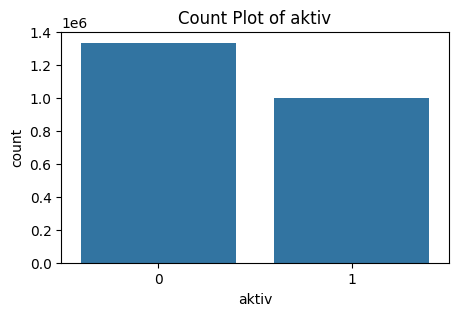

In [50]:
object_cols = ["aktiv"] 

for col in object_cols:
  plt.figure(figsize=(5, 3))
  sns.countplot(x=df_imp[col])
  plt.title(f"Count Plot of {col}")
  plt.show()

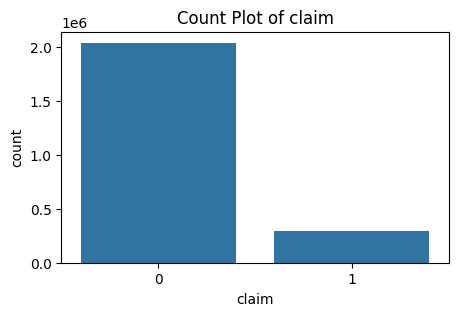

In [51]:
object_cols = ["claim"] 

for col in object_cols:
  plt.figure(figsize=(5, 3))
  sns.countplot(x=df_imp[col])
  plt.title(f"Count Plot of {col}")
  plt.show()

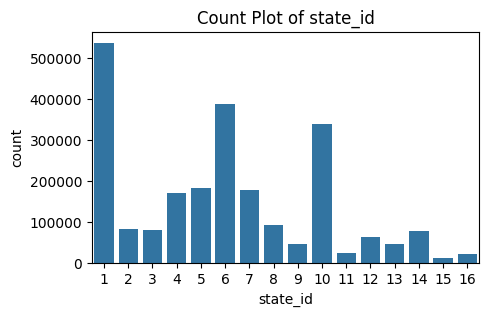

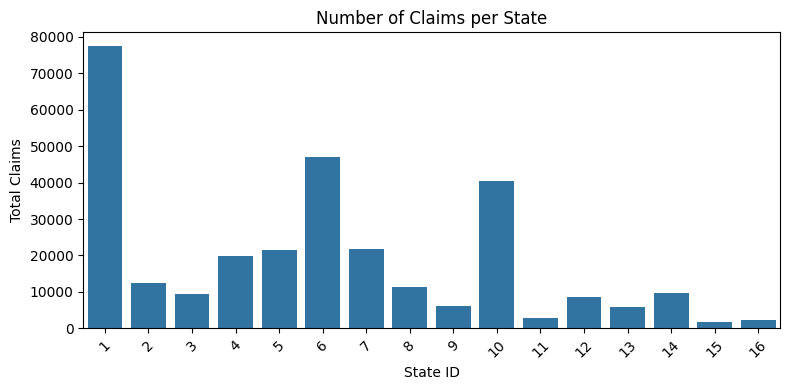

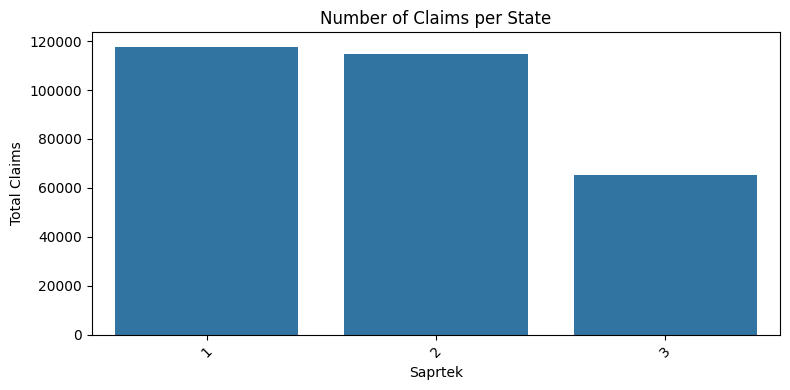

In [52]:
object_cols = ["state_id"] 

for col in object_cols:
  plt.figure(figsize=(5, 3))
  sns.countplot(x=df_imp[col])
  plt.title(f"Count Plot of {col}")
  plt.show()

  import matplotlib.pyplot as plt
import seaborn as sns

# Group by state and sum the claims
claims_per_state = df_imp.groupby("state_id")["claim"].sum().reset_index()

# Plot
plt.figure(figsize=(8, 4))
sns.barplot(x="state_id", y="claim", data=claims_per_state)
plt.title("Number of Claims per State")
plt.xlabel("State ID")
plt.ylabel("Total Claims")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Group by spartek and sum the claims
claims_per_spk = df_imp.groupby("spartek")["claim"].sum().reset_index()

# Plot
plt.figure(figsize=(8, 4))
sns.barplot(x="spartek", y="claim", data=claims_per_spk)
plt.title("Number of Claims per State")
plt.xlabel("Saprtek")
plt.ylabel("Total Claims")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



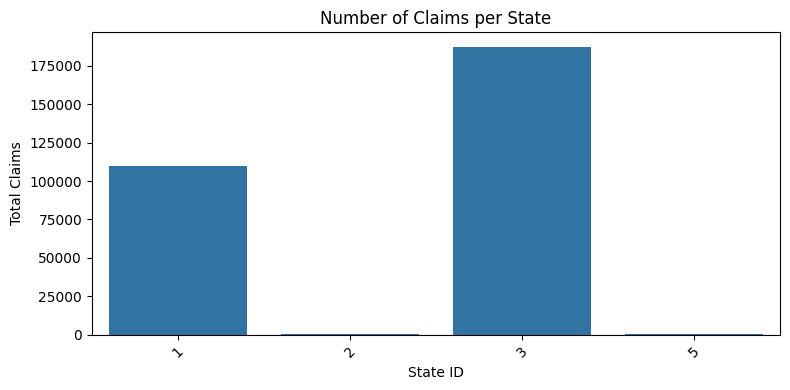

In [53]:
# Group by state and sum the claims
claims_per_state = df_imp.groupby("gender_id")["claim"].sum().reset_index()

# Plot
plt.figure(figsize=(8, 4))
sns.barplot(x="gender_id", y="claim", data=claims_per_state)
plt.title("Number of Claims per State")
plt.xlabel("State ID")
plt.ylabel("Total Claims")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [54]:
df_1.gender_id.unique()

array([1, 3, 5, 2])

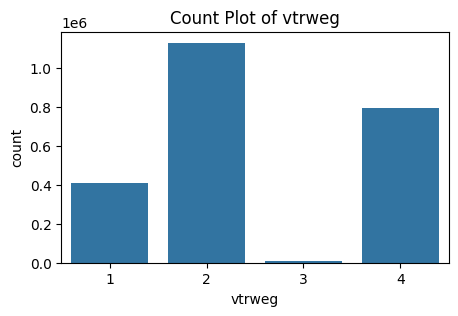

In [55]:
object_cols = ["vtrweg"] 

for col in object_cols:
  plt.figure(figsize=(5, 3))
  sns.countplot(x=df_imp[col])
  plt.title(f"Count Plot of {col}")
  plt.show()

  import matplotlib.pyplot as plt
import seaborn as sns

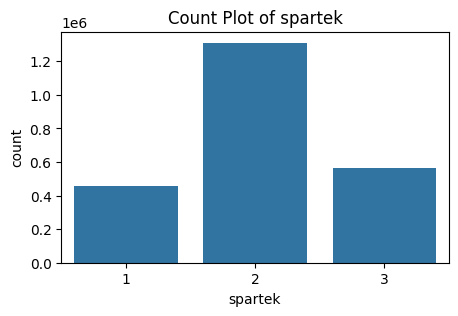

In [56]:
object_cols = ["spartek"] 

for col in object_cols:
  plt.figure(figsize=(5, 3))
  sns.countplot(x=df_imp[col])
  plt.title(f"Count Plot of {col}")
  plt.show()

  import matplotlib.pyplot as plt
import seaborn as sns

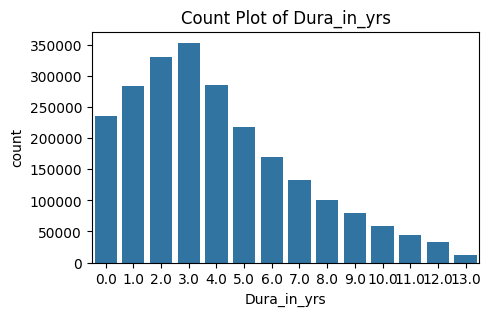

In [57]:
object_cols = ["Dura_in_yrs"] 

for col in object_cols:
  plt.figure(figsize=(5, 3))
  sns.countplot(x=df_imp[col])
  plt.title(f"Count Plot of {col}")
  plt.show()

  import matplotlib.pyplot as plt
import seaborn as sns

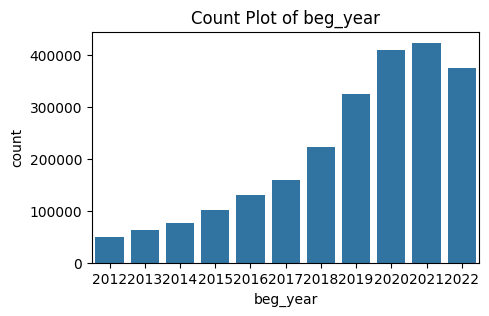

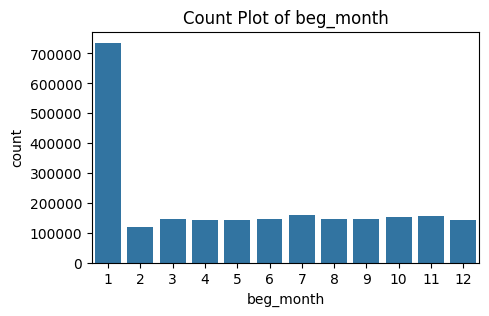

In [58]:

object_cols = ["beg_year"] 

for col in object_cols:
  plt.figure(figsize=(5, 3))
  sns.countplot(x=df_imp[col])
  plt.title(f"Count Plot of {col}")
  plt.show()

  import matplotlib.pyplot as plt
import seaborn as sns
object_cols = ["beg_month"] 

for col in object_cols:
  plt.figure(figsize=(5, 3))
  sns.countplot(x=df_imp[col])
  plt.title(f"Count Plot of {col}")
  plt.show()

  import matplotlib.pyplot as plt
import seaborn as sns


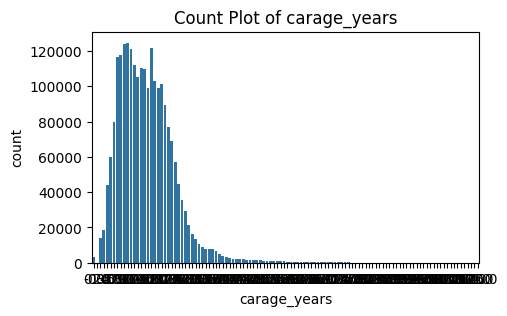

In [59]:
object_cols = ["carage_years"] 

for col in object_cols:
  plt.figure(figsize=(5, 3))
  sns.countplot(x=df_imp[col])
  plt.title(f"Count Plot of {col}")
  plt.show()


In [60]:
below_13 = (df['carage_years'] < 12).sum()
above_or_equal_13 = (df['carage_years'] >= 12).sum()

print(f"Cars below 13 years: {below_13}")
print(f"Cars 13 years and older: {above_or_equal_13}")


Cars below 13 years: 936359
Cars 13 years and older: 1399383


In [61]:
df_imp = df_imp[df_imp['carage_years'] < 13]


In [62]:

df_imp.shape

(1041668, 29)

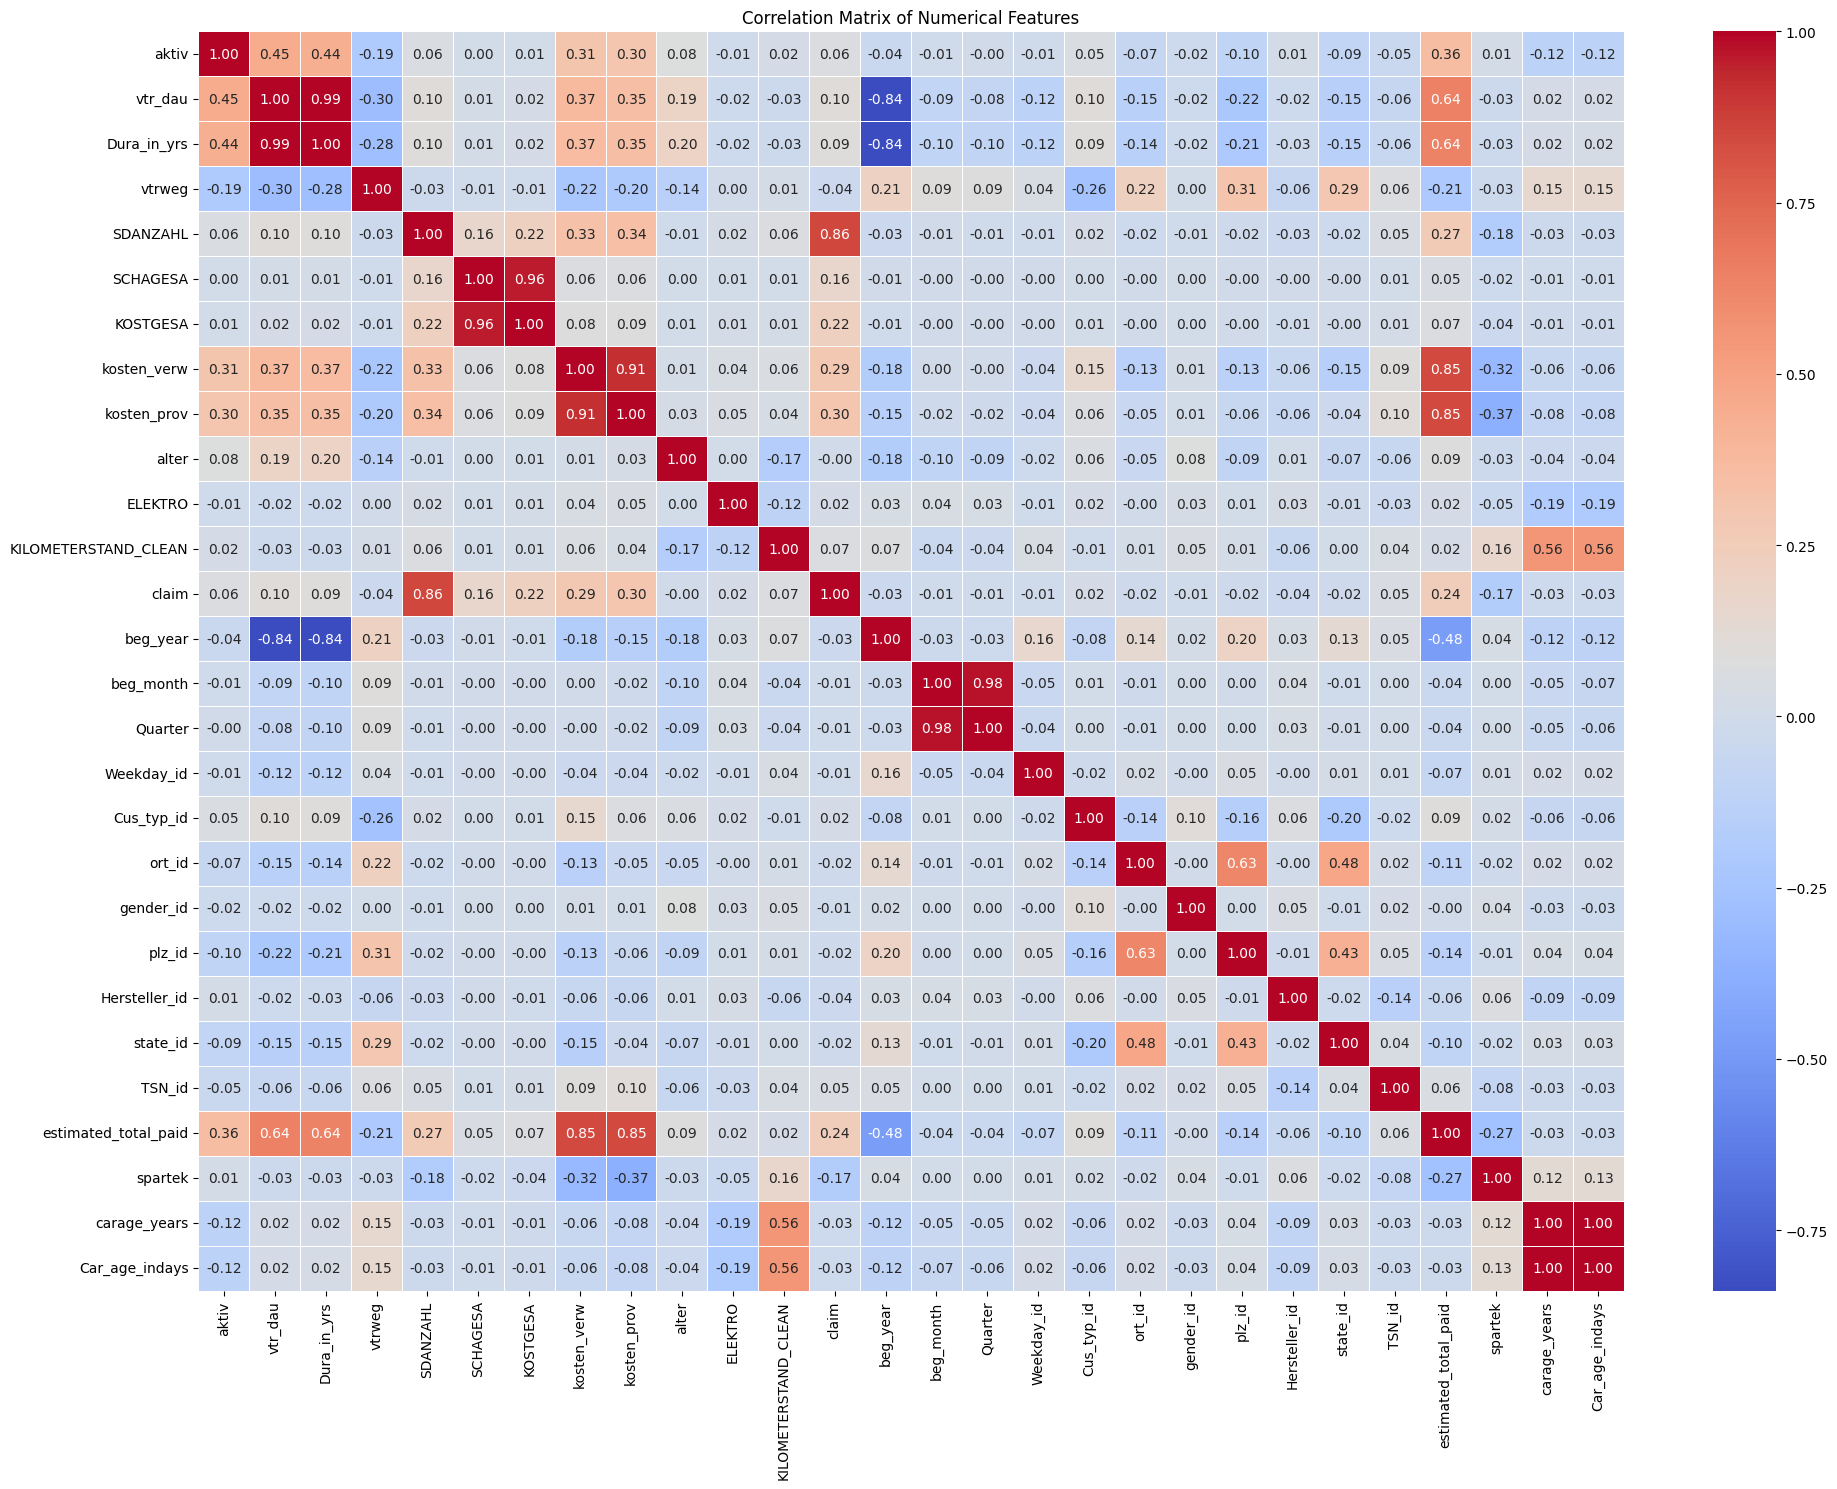

In [63]:

# 1. Select only numerical columns
numeric_df1 = df_imp.select_dtypes(include=['number'])

# 2. Compute correlation matrix
corr_matrix = numeric_df1.corr()

# 3. Display as heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

In [ ]:
#import optuna
import joblib

[I 2025-06-17 13:30:31,053] A new study created in memory with name: no-name-4d9d29c2-b36b-4b01-8804-7318e8b2ea9b
[I 2025-06-17 13:32:10,024] Trial 0 finished with value: 0.8531067321564082 and parameters: {'n_estimators': 182, 'max_depth': 24, 'min_samples_split': 9, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 0 with value: 0.8531067321564082.
[I 2025-06-17 13:33:33,931] Trial 1 finished with value: 0.8569656952288381 and parameters: {'n_estimators': 168, 'max_depth': 27, 'min_samples_split': 18, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 1 with value: 0.8569656952288381.
[I 2025-06-17 13:39:42,080] Trial 2 finished with value: 0.8581165858455695 and parameters: {'n_estimators': 299, 'max_depth': 19, 'min_samples_split': 12, 'min_samples_leaf': 16, 'max_features': None}. Best is trial 2 with value: 0.8581165858455695.
[I 2025-06-17 13:41:16,795] Trial 3 finished with value: 0.8491905849637501 and parameters: {'n_estimators': 219, 'max_depth': 20, 

🎯 Best Trial:
FrozenTrial(number=4, state=1, values=[0.8642089806012829], datetime_start=datetime.datetime(2025, 6, 17, 13, 41, 16, 797036), datetime_complete=datetime.datetime(2025, 6, 17, 13, 44, 33, 190317), params={'n_estimators': 123, 'max_depth': 26, 'min_samples_split': 19, 'min_samples_leaf': 8, 'max_features': None}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_estimators': IntDistribution(high=300, log=False, low=100, step=1), 'max_depth': IntDistribution(high=30, log=False, low=5, step=1), 'min_samples_split': IntDistribution(high=20, log=False, low=2, step=1), 'min_samples_leaf': IntDistribution(high=20, log=False, low=1, step=1), 'max_features': CategoricalDistribution(choices=('sqrt', 'log2', None))}, trial_id=4, value=None)
📊 Classification Report (Validation):
              precision    recall  f1-score   support

           0       0.90      0.79      0.84     53254
           1       0.82      0.91      0.86     55103

    accuracy        

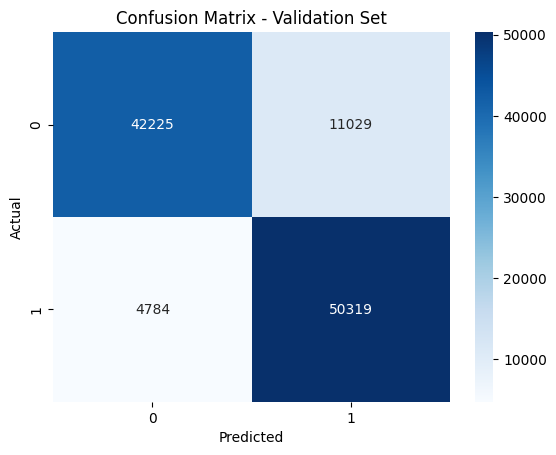

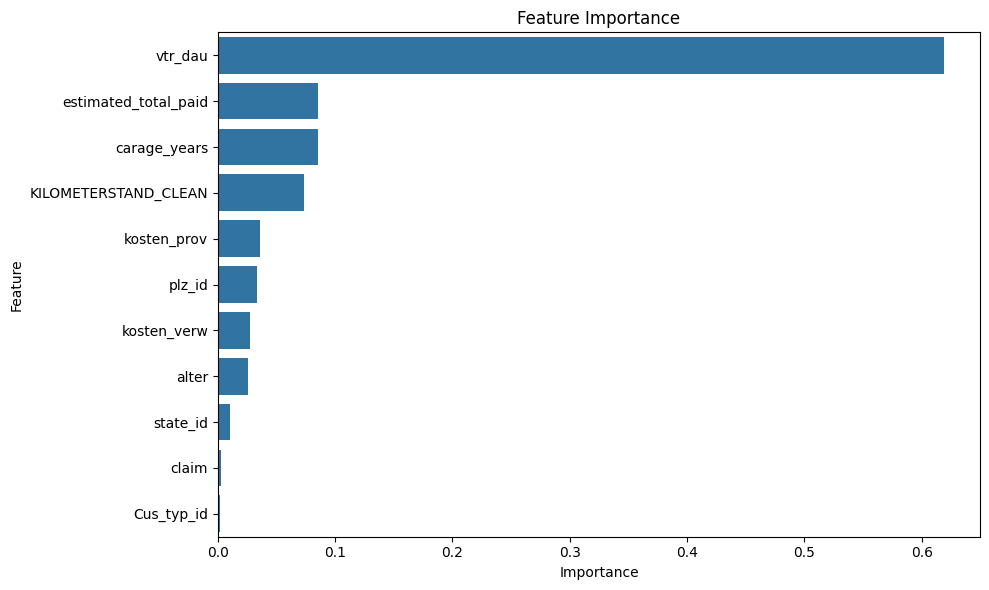

In [ ]:
#Training with Random Forest hyperparameter tuning using Optuna
import pandas as pd
import numpy as np
import optuna
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score

# ✅ 1. Select features and target
selected_features = [
    "vtr_dau", 
    "estimated_total_paid",
    "kosten_verw", 
    "kosten_prov", 
    "alter", 
    "KILOMETERSTAND_CLEAN", 
    "claim",
    "state_id",
    "plz_id",
    "Cus_typ_id",
    "carage_years"
]
target = 'aktiv'

# ✅ 2. Prepare data
df_model = df_imp[selected_features + [target]].dropna()
X = df_model[selected_features]
y = df_model[target]

# ✅ 3. Split data
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.11, random_state=42, stratify=y_temp)

# ✅ 4. Define Optuna objective
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 300),
        'max_depth': trial.suggest_int('max_depth', 5, 30),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
    }

    model = RandomForestClassifier(**params, random_state=42, n_jobs=-1)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    
    return f1_score(y_val, y_pred)

# ✅ 5. Run Optuna study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=5)

print("🎯 Best Trial:")
print(study.best_trial)

# ✅ 6. Train final model on best parameters
best_params = study.best_trial.params
final_model = RandomForestClassifier(**best_params, random_state=42, n_jobs=-1)
final_model.fit(X_train, y_train)

# 💾 Save the model
joblib.dump(final_model, 'tuned_random_forest_model.pkl')

# ✅ 7. Evaluate on validation
y_pred_val = final_model.predict(X_val)

print("📊 Classification Report (Validation):")
print(classification_report(y_val, y_pred_val))

cm = confusion_matrix(y_val, y_pred_val)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Validation Set")
plt.show()

# ✅ 8. Feature Importance Plot
importance_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': final_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature')
plt.title("Feature Importance")
plt.tight_layout()
plt.show()


In [65]:
# Training with hyperparameter tuning using Optuna for XGBoost
import pandas as pd
import numpy as np
import optuna
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from xgboost import XGBClassifier

# ✅ 1. Select features and target
selected_features = [ 
    "estimated_total_paid",
    "carage_years",
    "kosten_verw", 
    "kosten_prov", 
    "alter", 
    "KILOMETERSTAND_CLEAN", 
    "claim",
    "state_id",
    "plz_id",
    "Cus_typ_id"
]
target = 'aktiv'

# ✅ 2. Prepare data
df_model = df_imp[selected_features + [target]].dropna()
X = df_model[selected_features]
y = df_model[target]

# ✅ 3. Split data
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.11, random_state=42, stratify=y_temp)

# ✅ 4. Define Optuna objective for XGBoost
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 8),  # Reduced for overfitting
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
        'subsample': trial.suggest_float('subsample', 0.6, 0.9),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 0.9),
        'gamma': trial.suggest_float('gamma', 0, 2),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.1, 3),  # Start from 0.1
        'reg_lambda': trial.suggest_float('reg_lambda', 0.5, 3),
        'min_child_weight': trial.suggest_int('min_child_weight', 3, 10),  # Add this!
        'use_label_encoder': False,
        'eval_metric': 'logloss',
        'random_state': 42,
        'n_jobs': -1
    }

    # Use cross-validation for more robust evaluation
    from sklearn.model_selection import cross_val_score
    model = XGBClassifier(**params)
    cv_scores = cross_val_score(model, X_train, y_train, cv=3, scoring='f1')
    return cv_scores.mean()

# ✅ 5. Run Optuna study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

print("🎯 Best Trial:")
print(study.best_trial)

# ✅ 6. Train final model on best parameters
best_params = study.best_trial.params
best_params.update({'use_label_encoder': False, 'eval_metric': 'logloss', 'random_state': 42, 'n_jobs': -1})
final_model = XGBClassifier(**best_params)
final_model.fit(X_train, y_train)

# 💾 Save the model
joblib.dump(final_model, 'tuned_xgboost_model.pkl')

# ✅ 7. Evaluate on validation
y_pred_val = final_model.predict(X_val)

print("📊 Classification Report (Validation):")
print(classification_report(y_val, y_pred_val))

cm = confusion_matrix(y_val, y_pred_val)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Validation Set")
plt.show()

# ✅ 8. Feature Importance Plot
importance_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': final_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature')
plt.title("Feature Importance - XGBoost")
plt.tight_layout()
plt.show()

#✅ 9. Final evaluation on test set (add this)
y_pred_test = final_model.predict(X_test)
print("🎯 Final Test Set Performance:")
print(classification_report(y_test, y_pred_test))
print(f"Test F1-Score: {f1_score(y_test, y_pred_test):.4f}")


[I 2025-06-17 19:01:20,167] A new study created in memory with name: no-name-c5195e47-3846-496f-a5b7-2645593c8ac8
[W 2025-06-17 19:01:22,794] Trial 0 failed with parameters: {'n_estimators': 293, 'max_depth': 4, 'learning_rate': 0.06839389862595406, 'subsample': 0.7881238456229562, 'colsample_bytree': 0.8470564784966549, 'gamma': 1.8717720674101248, 'reg_alpha': 1.7869907556149078, 'reg_lambda': 2.3125433897679377, 'min_child_weight': 4} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "d:\IV_Mastertheis\venv\Lib\site-packages\optuna\study\_optimize.py", line 197, in _run_trial
    value_or_values = func(trial)
  File "C:\Users\VIP\AppData\Local\Temp\ipykernel_20620\2327789929.py", line 58, in objective
    cv_scores = cross_val_score(model, X_train, y_train, cv=3, scoring='f1')
  File "d:\IV_Mastertheis\venv\Lib\site-packages\sklearn\utils\_param_validation.py", line 216, in wrapper
    return func(*args, **kwargs)
  File "d:\IV_Masterthei

KeyboardInterrupt: 

In [ ]:
# PART 1: SETUP AND DATA PREPARATION
# Run this first to set up your data

import pandas as pd
import numpy as np
import optuna
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_auc_score, accuracy_score
from xgboost import XGBClassifier

# ✅ 1. Select features and target
selected_features = [ 
    "estimated_total_paid",
    "carage_years",
    "kosten_verw", 
    "kosten_prov", 
    "alter", 
    "KILOMETERSTAND_CLEAN", 
    "claim",
    "state_id",
    "plz_id",
    "Cus_typ_id"
]
target = 'aktiv'

print("🚀 Starting Enhanced XGBoost Training with Optuna")
print(f"📊 Features: {len(selected_features)}")
print(f"🎯 Target: {target}")

# ✅ 2. Prepare data
df_model = df_imp[selected_features + [target]].dropna()
print(f"📈 Dataset shape after cleaning: {df_model.shape}")
print(f"🎲 Target distribution:\n{df_model[target].value_counts(normalize=True)}")

X = df_model[selected_features]
y = df_model[target]

# ✅ 3. Split data strategically
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42, stratify=y
)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.11, random_state=42, stratify=y_temp
)

print(f"📊 Data splits:")
print(f"   Training: {X_train.shape[0]} samples")
print(f"   Validation: {X_val.shape[0]} samples") 
print(f"   Test: {X_test.shape[0]} samples")



🚀 Starting Enhanced XGBoost Training with Optuna
📊 Features: 10
🎯 Target: aktiv
📈 Dataset shape after cleaning: (1041668, 11)
🎲 Target distribution:
aktiv
1   0.51
0   0.49
Name: proportion, dtype: float64
📊 Data splits:
   Training: 834375 samples
   Validation: 103126 samples
   Test: 104167 samples
✅ Part 1 completed! Data is ready for hyperparameter tuning.


In [68]:
# ✅ 4. Enhanced Optuna objective function
def objective(trial):
    """
    Enhanced objective function with regularization focus to combat overfitting
    """
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 8),  # Reduced to combat overfitting
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
        'subsample': trial.suggest_float('subsample', 0.6, 0.9),  # Regularization
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 0.9),
        'gamma': trial.suggest_float('gamma', 0, 2),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.1, 3),  # L1 regularization
        'reg_lambda': trial.suggest_float('reg_lambda', 0.5, 3),  # L2 regularization
        'min_child_weight': trial.suggest_int('min_child_weight', 3, 10),  # Prevent overfitting
        'use_label_encoder': False,
        'random_state': 42,
        'n_jobs': -1,
        'eval_metric': 'logloss'
    }
    
    # Use cross-validation for robust evaluation
    model = XGBClassifier(**params)
    cv_scores = cross_val_score(
        model, X_train, y_train, 
        cv=3,  # 3-fold CV for speed
        scoring='f1',
        n_jobs=-1
    )
    
    return cv_scores.mean()

# ✅ 5. Run Optuna optimization with progress tracking
def print_callback(study, trial):
    """Callback to print progress"""
    print(f"⚡ Trial {trial.number:3d}: F1 = {trial.value:.4f} | Best = {study.best_value:.4f}")

print("\n🔍 Starting hyperparameter optimization...")
study = optuna.create_study(
    direction='maximize',
    sampler=optuna.samplers.TPESampler(seed=42)
)

n_trials = 20  

study.optimize(
    objective, 
    n_trials=n_trials,
    callbacks=[print_callback],
    show_progress_bar=True
)

print(f"\n🎯 Optimization completed!")
print(f"🏆 Best F1-Score: {study.best_value:.4f}")
print(f"📋 Best Parameters:")
for key, value in study.best_params.items():
    print(f"   {key}: {value}")

print("✅ Part 2 completed! Best parameters found.")

[I 2025-06-17 19:04:09,746] A new study created in memory with name: no-name-b5ce1112-fef7-46f8-85b8-f89d7828387d



🔍 Starting hyperparameter optimization...


Best trial: 0. Best value: 0.831695:   5%|▌         | 1/20 [00:34<10:53, 34.42s/it]

[I 2025-06-17 19:04:44,165] Trial 0 finished with value: 0.8316954808190419 and parameters: {'n_estimators': 250, 'max_depth': 8, 'learning_rate': 0.14907884894416698, 'subsample': 0.779597545259111, 'colsample_bytree': 0.6468055921327309, 'gamma': 0.3119890406724053, 'reg_alpha': 0.2684424752877784, 'reg_lambda': 2.665440364437338, 'min_child_weight': 7}. Best is trial 0 with value: 0.8316954808190419.
⚡ Trial   0: F1 = 0.8317 | Best = 0.8317


Best trial: 0. Best value: 0.831695:  10%|█         | 2/20 [00:57<08:21, 27.86s/it]

[I 2025-06-17 19:05:07,438] Trial 1 finished with value: 0.8131525198915188 and parameters: {'n_estimators': 383, 'max_depth': 3, 'learning_rate': 0.19428287191077892, 'subsample': 0.8497327922401265, 'colsample_bytree': 0.6637017332034828, 'gamma': 0.36364993441420124, 'reg_alpha': 0.631873078574958, 'reg_lambda': 1.2606056073988443, 'min_child_weight': 7}. Best is trial 0 with value: 0.8316954808190419.
⚡ Trial   1: F1 = 0.8132 | Best = 0.8317


Best trial: 0. Best value: 0.831695:  15%|█▌        | 3/20 [01:17<06:54, 24.40s/it]

[I 2025-06-17 19:05:27,721] Trial 2 finished with value: 0.8140783363759806 and parameters: {'n_estimators': 273, 'max_depth': 4, 'learning_rate': 0.1262520499972521, 'subsample': 0.6418481581956126, 'colsample_bytree': 0.6876433945605654, 'gamma': 0.7327236865873834, 'reg_alpha': 1.4226029542294043, 'reg_lambda': 2.462939903482534, 'min_child_weight': 4}. Best is trial 0 with value: 0.8316954808190419.
⚡ Trial   2: F1 = 0.8141 | Best = 0.8317


Best trial: 0. Best value: 0.831695:  20%|██        | 4/20 [01:50<07:21, 27.56s/it]

[I 2025-06-17 19:06:00,132] Trial 3 finished with value: 0.8093733480739825 and parameters: {'n_estimators': 306, 'max_depth': 6, 'learning_rate': 0.01882557841679957, 'subsample': 0.7822634555704315, 'colsample_bytree': 0.6511572371061874, 'gamma': 0.13010318597055903, 'reg_alpha': 2.8517680580346663, 'reg_lambda': 2.9140800826863984, 'min_child_weight': 9}. Best is trial 0 with value: 0.8316954808190419.
⚡ Trial   3: F1 = 0.8094 | Best = 0.8317


Best trial: 0. Best value: 0.831695:  25%|██▌       | 5/20 [02:06<05:49, 23.33s/it]

[I 2025-06-17 19:06:15,953] Trial 4 finished with value: 0.8088563921789874 and parameters: {'n_estimators': 222, 'max_depth': 3, 'learning_rate': 0.14000427503730983, 'subsample': 0.7320457481218804, 'colsample_bytree': 0.6366114704534336, 'gamma': 0.9903538202225404, 'reg_alpha': 0.19972671123413335, 'reg_lambda': 2.7733010051969553, 'min_child_weight': 5}. Best is trial 0 with value: 0.8316954808190419.
⚡ Trial   4: F1 = 0.8089 | Best = 0.8317


Best trial: 0. Best value: 0.831695:  30%|███       | 6/20 [02:37<06:06, 26.16s/it]

[I 2025-06-17 19:06:47,620] Trial 5 finished with value: 0.8148573808870193 and parameters: {'n_estimators': 365, 'max_depth': 4, 'learning_rate': 0.10881292402378405, 'subsample': 0.7640130838029839, 'colsample_bytree': 0.6554563366576581, 'gamma': 1.9391692555291171, 'reg_alpha': 2.347885187747232, 'reg_lambda': 2.848747353910473, 'min_child_weight': 10}. Best is trial 0 with value: 0.8316954808190419.
⚡ Trial   5: F1 = 0.8149 | Best = 0.8317


Best trial: 0. Best value: 0.831695:  35%|███▌      | 7/20 [03:22<06:59, 32.24s/it]

[I 2025-06-17 19:07:32,380] Trial 6 finished with value: 0.8201377321775706 and parameters: {'n_estimators': 339, 'max_depth': 8, 'learning_rate': 0.026813575389864702, 'subsample': 0.6587948587257435, 'colsample_bytree': 0.6135681866731614, 'gamma': 0.6506606615265287, 'reg_alpha': 1.227164140099498, 'reg_lambda': 1.1783725794347397, 'min_child_weight': 9}. Best is trial 0 with value: 0.8316954808190419.
⚡ Trial   6: F1 = 0.8201 | Best = 0.8317


Best trial: 0. Best value: 0.831695:  40%|████      | 8/20 [03:39<05:28, 27.39s/it]

[I 2025-06-17 19:07:49,369] Trial 7 finished with value: 0.8137166156849526 and parameters: {'n_estimators': 243, 'max_depth': 4, 'learning_rate': 0.1131122558000672, 'subsample': 0.6422772674924287, 'colsample_bytree': 0.8406590942262119, 'gamma': 0.14910128735954165, 'reg_alpha': 2.9619721161415002, 'reg_lambda': 2.4306119232416434, 'min_child_weight': 4}. Best is trial 0 with value: 0.8316954808190419.
⚡ Trial   7: F1 = 0.8137 | Best = 0.8317


Best trial: 0. Best value: 0.831695:  45%|████▌     | 9/20 [03:50<04:03, 22.14s/it]

[I 2025-06-17 19:07:59,986] Trial 8 finished with value: 0.8210425255350623 and parameters: {'n_estimators': 102, 'max_depth': 7, 'learning_rate': 0.14430289533104726, 'subsample': 0.8187021504122962, 'colsample_bytree': 0.8313811040057837, 'gamma': 0.14808930346818072, 'reg_alpha': 1.1395506127783905, 'reg_lambda': 0.7896726488128243, 'min_child_weight': 9}. Best is trial 0 with value: 0.8316954808190419.
⚡ Trial   8: F1 = 0.8210 | Best = 0.8317


Best trial: 0. Best value: 0.831695:  50%|█████     | 10/20 [04:13<03:44, 22.42s/it]

[I 2025-06-17 19:08:23,035] Trial 9 finished with value: 0.8011676047541924 and parameters: {'n_estimators': 349, 'max_depth': 4, 'learning_rate': 0.02207608655434449, 'subsample': 0.6932946965146987, 'colsample_bytree': 0.6975549966080241, 'gamma': 1.4592123566761281, 'reg_alpha': 1.9489166669301181, 'reg_lambda': 2.7180318564408164, 'min_child_weight': 6}. Best is trial 0 with value: 0.8316954808190419.
⚡ Trial   9: F1 = 0.8012 | Best = 0.8317


Best trial: 0. Best value: 0.831695:  55%|█████▌    | 11/20 [04:55<04:15, 28.34s/it]

[I 2025-06-17 19:09:04,784] Trial 10 finished with value: 0.8316486241813307 and parameters: {'n_estimators': 478, 'max_depth': 8, 'learning_rate': 0.06846190017554982, 'subsample': 0.8796871025735362, 'colsample_bytree': 0.7564020035588104, 'gamma': 1.3804941471382906, 'reg_alpha': 0.14391828759799483, 'reg_lambda': 2.0584412965736636, 'min_child_weight': 7}. Best is trial 0 with value: 0.8316954808190419.
⚡ Trial  10: F1 = 0.8316 | Best = 0.8317


Best trial: 0. Best value: 0.831695:  60%|██████    | 12/20 [05:37<04:20, 32.50s/it]

[I 2025-06-17 19:09:46,805] Trial 11 finished with value: 0.8307520600963373 and parameters: {'n_estimators': 499, 'max_depth': 8, 'learning_rate': 0.06385020557104318, 'subsample': 0.8884016314330396, 'colsample_bytree': 0.7682720105447061, 'gamma': 1.4053984655159972, 'reg_alpha': 0.1319649411455889, 'reg_lambda': 1.933227444128073, 'min_child_weight': 7}. Best is trial 0 with value: 0.8316954808190419.
⚡ Trial  11: F1 = 0.8308 | Best = 0.8317


Best trial: 0. Best value: 0.831695:  65%|██████▌   | 13/20 [06:13<03:55, 33.68s/it]

[I 2025-06-17 19:10:23,205] Trial 12 finished with value: 0.8274280913655154 and parameters: {'n_estimators': 476, 'max_depth': 7, 'learning_rate': 0.07433400076272832, 'subsample': 0.8990975244271294, 'colsample_bytree': 0.7406397936973761, 'gamma': 1.4178743213208747, 'reg_alpha': 0.704012771715589, 'reg_lambda': 1.9637597249046477, 'min_child_weight': 7}. Best is trial 0 with value: 0.8316954808190419.
⚡ Trial  12: F1 = 0.8274 | Best = 0.8317


Best trial: 0. Best value: 0.831695:  70%|███████   | 14/20 [06:29<02:49, 28.23s/it]

[I 2025-06-17 19:10:38,851] Trial 13 finished with value: 0.8259743914693014 and parameters: {'n_estimators': 171, 'max_depth': 7, 'learning_rate': 0.18656387492194187, 'subsample': 0.8192733906910248, 'colsample_bytree': 0.7755197795880059, 'gamma': 1.750402751752063, 'reg_alpha': 0.6482768598253295, 'reg_lambda': 2.2205737798754983, 'min_child_weight': 6}. Best is trial 0 with value: 0.8316954808190419.
⚡ Trial  13: F1 = 0.8260 | Best = 0.8317


Best trial: 14. Best value: 0.848528:  75%|███████▌  | 15/20 [07:09<02:38, 31.76s/it]

[I 2025-06-17 19:11:18,798] Trial 14 finished with value: 0.8485277954871178 and parameters: {'n_estimators': 417, 'max_depth': 8, 'learning_rate': 0.16402190794570823, 'subsample': 0.7248094400752194, 'colsample_bytree': 0.8981898888016117, 'gamma': 1.0622480607029205, 'reg_alpha': 0.38595662313701007, 'reg_lambda': 1.5183081593096994, 'min_child_weight': 8}. Best is trial 14 with value: 0.8485277954871178.
⚡ Trial  14: F1 = 0.8485 | Best = 0.8485


Best trial: 14. Best value: 0.848528:  80%|████████  | 16/20 [07:41<02:07, 31.84s/it]

[I 2025-06-17 19:11:50,811] Trial 15 finished with value: 0.8340952454610036 and parameters: {'n_estimators': 417, 'max_depth': 6, 'learning_rate': 0.16098261918129686, 'subsample': 0.716481202370179, 'colsample_bytree': 0.8850328991425761, 'gamma': 0.9792008227027074, 'reg_alpha': 0.9486881968745856, 'reg_lambda': 1.3415137139637412, 'min_child_weight': 8}. Best is trial 14 with value: 0.8485277954871178.
⚡ Trial  15: F1 = 0.8341 | Best = 0.8485


Best trial: 14. Best value: 0.848528:  85%|████████▌ | 17/20 [08:12<01:35, 31.82s/it]

[I 2025-06-17 19:12:22,573] Trial 16 finished with value: 0.8349443776648529 and parameters: {'n_estimators': 420, 'max_depth': 6, 'learning_rate': 0.16951246120171826, 'subsample': 0.7143908630405588, 'colsample_bytree': 0.8929247540061138, 'gamma': 1.050819627026542, 'reg_alpha': 0.9981322611784773, 'reg_lambda': 1.5462967017578386, 'min_child_weight': 8}. Best is trial 14 with value: 0.8485277954871178.
⚡ Trial  16: F1 = 0.8349 | Best = 0.8485


Best trial: 14. Best value: 0.848528:  90%|█████████ | 18/20 [08:41<01:01, 30.88s/it]

[I 2025-06-17 19:12:51,282] Trial 17 finished with value: 0.826336043742562 and parameters: {'n_estimators': 418, 'max_depth': 5, 'learning_rate': 0.1686776008493599, 'subsample': 0.6889819915522287, 'colsample_bytree': 0.8899889561858011, 'gamma': 1.1146486605928478, 'reg_alpha': 1.9195174971834064, 'reg_lambda': 1.6368937220352058, 'min_child_weight': 10}. Best is trial 14 with value: 0.8485277954871178.
⚡ Trial  17: F1 = 0.8263 | Best = 0.8485


Best trial: 14. Best value: 0.848528:  95%|█████████▌| 19/20 [09:12<00:30, 30.94s/it]

[I 2025-06-17 19:13:22,358] Trial 18 finished with value: 0.8268088579391465 and parameters: {'n_estimators': 418, 'max_depth': 5, 'learning_rate': 0.17715741448296846, 'subsample': 0.6004598382522616, 'colsample_bytree': 0.8457202128703503, 'gamma': 0.7278873100825659, 'reg_alpha': 1.7355266271621557, 'reg_lambda': 1.5418573282416017, 'min_child_weight': 8}. Best is trial 14 with value: 0.8485277954871178.
⚡ Trial  18: F1 = 0.8268 | Best = 0.8485


Best trial: 14. Best value: 0.848528: 100%|██████████| 20/20 [09:47<00:00, 29.38s/it]

[I 2025-06-17 19:13:57,357] Trial 19 finished with value: 0.8263621127092896 and parameters: {'n_estimators': 450, 'max_depth': 6, 'learning_rate': 0.0861835851539274, 'subsample': 0.7469998595485513, 'colsample_bytree': 0.8053873688405686, 'gamma': 1.1731301440927437, 'reg_alpha': 0.8692020742513291, 'reg_lambda': 0.8962709821088296, 'min_child_weight': 3}. Best is trial 14 with value: 0.8485277954871178.
⚡ Trial  19: F1 = 0.8264 | Best = 0.8485

🎯 Optimization completed!
🏆 Best F1-Score: 0.8485
📋 Best Parameters:
   n_estimators: 417
   max_depth: 8
   learning_rate: 0.16402190794570823
   subsample: 0.7248094400752194
   colsample_bytree: 0.8981898888016117
   gamma: 1.0622480607029205
   reg_alpha: 0.38595662313701007
   reg_lambda: 1.5183081593096994
   min_child_weight: 8
✅ Part 2 completed! Best parameters found.


In [70]:
# ✅ 6. Train final model with best parameters
print("\n🏗️ Training final model...")
best_params = study.best_params.copy()
best_params.update({
    'use_label_encoder': False, 
    'eval_metric': 'logloss', 
    'random_state': 42, 
    'n_jobs': -1,
    'early_stopping_rounds': 20  # Add early stopping to model parameters
})

final_model = XGBClassifier(**best_params)

# Fit with evaluation set for early stopping
final_model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    verbose=False
)

# 💾 Save the model
model_filename = 'enhanced_tuned_xgboost_model.pkl'
joblib.dump(final_model, model_filename)
print(f"💾 Model saved as: {model_filename}")

# ✅ 7. Comprehensive evaluation on validation set
print("\n📊 VALIDATION SET EVALUATION:")
y_pred_val = final_model.predict(X_val)
y_pred_proba_val = final_model.predict_proba(X_val)[:, 1]

print("Classification Report:")
print(classification_report(y_val, y_pred_val))

# Additional metrics
val_f1 = f1_score(y_val, y_pred_val)
val_accuracy = accuracy_score(y_val, y_pred_val)
val_auc = roc_auc_score(y_val, y_pred_proba_val)

print(f"📈 Additional Metrics:")
print(f"   F1-Score: {val_f1:.4f}")
print(f"   Accuracy: {val_accuracy:.4f}")
print(f"   ROC-AUC: {val_auc:.4f}")

# ✅ 8. Final evaluation on test set
print("\n🎯 FINAL TEST SET EVALUATION:")
y_pred_test = final_model.predict(X_test)
y_pred_proba_test = final_model.predict_proba(X_test)[:, 1]

print("Classification Report:")
print(classification_report(y_test, y_pred_test))

# Test metrics
test_f1 = f1_score(y_test, y_pred_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
test_auc = roc_auc_score(y_test, y_pred_proba_test)

print(f"📈 Test Set Metrics:")
print(f"   F1-Score: {test_f1:.4f}")
print(f"   Accuracy: {test_accuracy:.4f}")
print(f"   ROC-AUC: {test_auc:.4f}")

# Overfitting check
f1_diff = abs(val_f1 - test_f1)
if f1_diff < 0.02:
    print(f"✅ Model generalization: Excellent (F1 diff: {f1_diff:.4f})")
elif f1_diff < 0.05:
    print(f"⚠️  Model generalization: Good (F1 diff: {f1_diff:.4f})")
else:
    print(f"❌ Model generalization: Poor (F1 diff: {f1_diff:.4f})")

print("✅ Part 3 completed! Model trained and evaluated.")


🏗️ Training final model...
💾 Model saved as: enhanced_tuned_xgboost_model.pkl

📊 VALIDATION SET EVALUATION:
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.75      0.82     50353
           1       0.79      0.92      0.85     52773

    accuracy                           0.84    103126
   macro avg       0.85      0.84      0.84    103126
weighted avg       0.85      0.84      0.84    103126

📈 Additional Metrics:
   F1-Score: 0.8535
   Accuracy: 0.8381
   ROC-AUC: 0.9097

🎯 FINAL TEST SET EVALUATION:
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.75      0.82     50862
           1       0.79      0.92      0.85     53305

    accuracy                           0.84    104167
   macro avg       0.85      0.83      0.83    104167
weighted avg       0.84      0.84      0.83    104167

📈 Test Set Metrics:
   F1-Score: 0.8517
   Accuracy: 0.8362
   ROC-AUC: 0.9100
✅

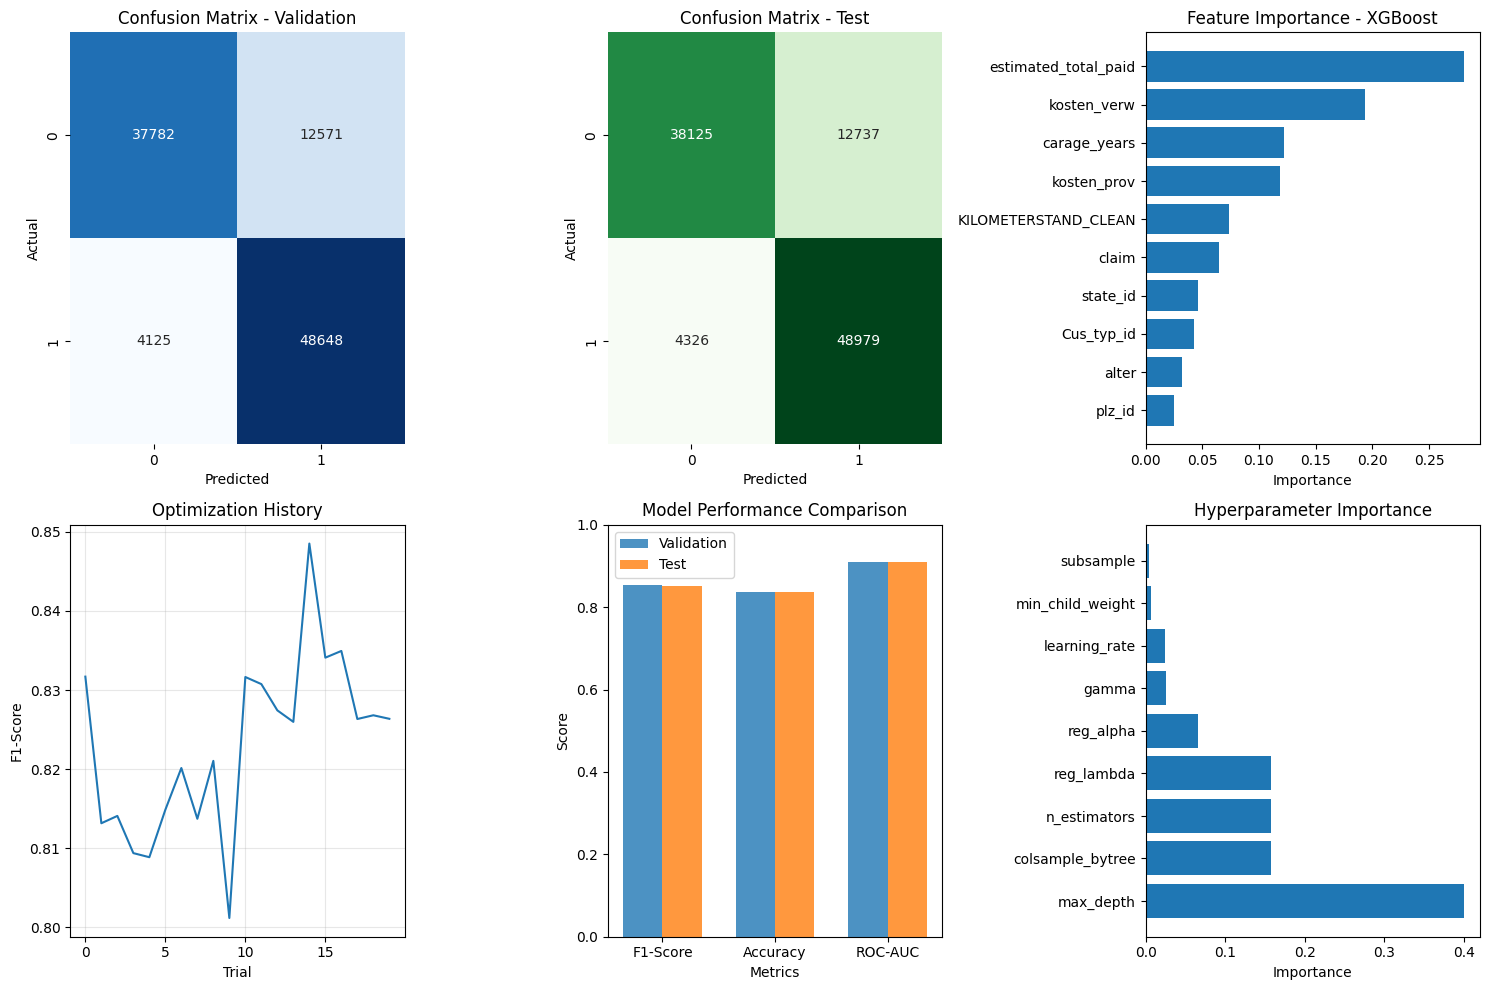


📋 FINAL SUMMARY REPORT
🎯 Best Hyperparameters Found:
   n_estimators: 417
   max_depth: 8
   learning_rate: 0.16402190794570823
   subsample: 0.7248094400752194
   colsample_bytree: 0.8981898888016117
   gamma: 1.0622480607029205
   reg_alpha: 0.38595662313701007
   reg_lambda: 1.5183081593096994
   min_child_weight: 8

📊 Performance Summary:
   Validation F1: 0.8535
   Test F1:       0.8517
   Validation AUC: 0.9097
   Test AUC:       0.9100

💾 Model saved as: enhanced_tuned_xgboost_model.pkl
🎉 Training completed successfully!
📊 Study results saved as: optuna_study_results.pkl

📈 Results Summary:
      Dataset  F1_Score  Accuracy  ROC_AUC
0  Validation      0.85      0.84     0.91
1        Test      0.85      0.84     0.91
✅ Part 4 completed! All visualizations and reports generated.


In [71]:
# PART 4: VISUALIZATIONS AND FINAL REPORT
# Run this after Part 3 is completed

# ✅ 9. Visualizations
plt.figure(figsize=(15, 10))

# Confusion Matrix - Validation
plt.subplot(2, 3, 1)
cm_val = confusion_matrix(y_val, y_pred_val)
sns.heatmap(cm_val, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Validation")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Confusion Matrix - Test
plt.subplot(2, 3, 2)
cm_test = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.title("Confusion Matrix - Test")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Feature Importance
plt.subplot(2, 3, 3)
importance_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': final_model.feature_importances_
}).sort_values(by='Importance', ascending=True)

plt.barh(range(len(importance_df)), importance_df['Importance'])
plt.yticks(range(len(importance_df)), importance_df['Feature'])
plt.title("Feature Importance - XGBoost")
plt.xlabel("Importance")

# Optuna optimization history
plt.subplot(2, 3, 4)
trials_df = study.trials_dataframe()
plt.plot(trials_df['number'], trials_df['value'])
plt.title("Optimization History")
plt.xlabel("Trial")
plt.ylabel("F1-Score")
plt.grid(True, alpha=0.3)

# Performance comparison
plt.subplot(2, 3, 5)
metrics = ['F1-Score', 'Accuracy', 'ROC-AUC']
val_scores = [val_f1, val_accuracy, val_auc]
test_scores = [test_f1, test_accuracy, test_auc]

x = np.arange(len(metrics))
width = 0.35

plt.bar(x - width/2, val_scores, width, label='Validation', alpha=0.8)
plt.bar(x + width/2, test_scores, width, label='Test', alpha=0.8)
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.xticks(x, metrics)
plt.legend()
plt.ylim(0, 1)

# Parameter importance
plt.subplot(2, 3, 6)
param_importance = optuna.importance.get_param_importances(study)
params = list(param_importance.keys())
importances = list(param_importance.values())

plt.barh(range(len(params)), importances)
plt.yticks(range(len(params)), params)
plt.title("Hyperparameter Importance")
plt.xlabel("Importance")

plt.tight_layout()
plt.show()

# ✅ 10. Summary report
print("\n" + "="*60)
print("📋 FINAL SUMMARY REPORT")
print("="*60)
print(f"🎯 Best Hyperparameters Found:")
for param, value in study.best_params.items():
    print(f"   {param}: {value}")

print(f"\n📊 Performance Summary:")
print(f"   Validation F1: {val_f1:.4f}")
print(f"   Test F1:       {test_f1:.4f}")
print(f"   Validation AUC: {val_auc:.4f}")
print(f"   Test AUC:       {test_auc:.4f}")

print(f"\n💾 Model saved as: {model_filename}")
print("🎉 Training completed successfully!")

# ✅ 11. Optional: Save study results
study_filename = 'optuna_study_results.pkl'
joblib.dump(study, study_filename)
print(f"📊 Study results saved as: {study_filename}")

# Create results dataframe for future analysis
results_df = pd.DataFrame({
    'Dataset': ['Validation', 'Test'],
    'F1_Score': [val_f1, test_f1],
    'Accuracy': [val_accuracy, test_accuracy],
    'ROC_AUC': [val_auc, test_auc]
})

print(f"\n📈 Results Summary:")
print(results_df)

print("✅ Part 4 completed! All visualizations and reports generated.")

In [ ]:
#Drop HSN later we alredy have values from hesteller and id 

#Best month for sales 

#best bundesland for 

Look for ml models for aktiv in active customer 

find the salary of a person from car 

find the type of job he does 